# Project LELEC

## Recode features and Data set

In [1]:
import statistics
import numpy as np
import scipy.stats
import statsmodels.api as sm
from scipy.stats import shapiro
import pandas as pd
import jupyterthemes as jt
import researchpy as rp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from collections import defaultdict
from matplotlib.cm import ScalarMappable
from scipy.stats import linregress
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import GammaRegressor
from sklearn._loss.glm_distribution import (
    TweedieDistribution,
    NormalDistribution, PoissonDistribution,
    GammaDistribution, InverseGaussianDistribution,
)
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from numpy import arange
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from yellowbrick.regressor import cooks_distance
sns.set(style="ticks", context="talk")
plt.style.use('classic')

C:\Users\desktop\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
X1 = pd.read_csv('X1.csv')
Y1 = pd.read_csv('Y1.csv', header=None, names=['revenue'])
data = X1.assign(Revenue = Y1.values)
del data['is_adult']
data = data.replace(r'\N', np.nan).dropna().reset_index(drop=True)
data.runtime = data.runtime.astype(int)
data["genres"]= data["genres"].str.split(",")
data.runtime = data.runtime.astype(int)
data["Time"] = (data.release_year+1) - data.production_year
data

Unnamed: 0                                     title  \
0           2512                             Doc Hollywood   
1           5795                            Ballets Russes   
2             38  Cirque du Freak: The Vampire's Assistant   
3           8056                                  Deadfall   
4           6753                                 They Live   
...          ...                                       ...   
3623         668                      Flags of Our Fathers   
3624         223                             Office Killer   
3625        4459                        He Was a Quiet Man   
3626        1517                   Dr. Jekyll and Ms. Hyde   
3627        5439                              Factory Girl   

                                                img_url  \
0     https://m.media-amazon.com/images/M/MV5BNTcwMj...   
1     https://m.media-amazon.com/images/M/MV5BMTIyND...   
2     https://m.media-amazon.com/images/M/MV5BMTI1ND...   
3     https://m.media-amazon.com/images/M/MV5BMTg2OD...   
4     https://m.media-amazon.com/images/M/MV5BMTQ3Mj...   
...                                                 ...   
3623  https://m.media-amazon.com/images/M/MV5BMTU2Mj...   
3624  https://m.media-amazon.com/images/M/MV5BNDg2NT...   
3625  https://m.media-amazon.com/images/M/MV5BMTUzMT...   
3626  https://m.media-amazon.com/images/M/MV5BMDc3Y2...   
3627  https://m.media-amazon.com/images/M/MV5BYTQ5ZT...   

                                            description  ratings   n_votes  \
0     Doc Hollywood: Directed by Michael Caton-Jones...      6.2   33519.0   
1     Ballets Russes: Directed by Daniel Geller, Day...      7.7     647.0   
2     Cirque du Freak: The Vampire's Assistant: Dire...      5.8   43497.0   
3     Deadfall: Directed by Jerry Hopper. With Van J...      7.7      16.0   
4     They Live: Directed by John Carpenter. With Ro...      7.3  111600.0   
...                                                 ...      ...       ...   
3623  Flags of Our Fathers: Directed by Clint Eastwo...      7.1  118129.0   
3624  Office Killer: Directed by Cindy Sherman. With...      5.1    1938.0   
3625  He Was a Quiet Man: Directed by Frank A. Cappe...      6.8   22004.0   
3626  Dr. Jekyll and Ms. Hyde: Directed by David Pri...      4.5    2653.0   
3627  Factory Girl: Directed by George Hickenlooper....      6.5   20789.0   

      production_year  runtime                         genres  release_year  \
0                1991      104       [Comedy, Drama, Romance]        1991.0   
1                2005      118  [Documentary, History, Music]        2005.0   
2                2009      119   [Action, Adventure, Fantasy]        2009.0   
3                1959       30                      [Western]        1993.0   
4                1988       94       [Action, Horror, Sci-Fi]        1988.0   
...               ...      ...                            ...           ...   
3623             2006      135     [Action, Adventure, Drama]        2006.0   
3624             1997       82        [Comedy, Crime, Horror]        1997.0   
3625             2007      100     [Drama, Romance, Thriller]        2007.0   
3626             1995      100      [Comedy, Romance, Sci-Fi]        1995.0   
3627             2006      100             [Biography, Drama]        2006.0   

      studio                                     img_embeddings  \
0         WB  [0.47755364, 0.8723433, 1.2153144, 0.3793078, ...   
1      Zeit.  [0.26525393, 2.4802532, 0.84571683, 0.21649377...   
2       Uni.  [0.06563655, 1.2579643, 0.25442713, 0.3307045,...   
3      Trim.  [0.23510928, 4.0279293, 0.6071904, 0.2641873, ...   
4       Uni.  [0.47165212, 1.9936308, 1.0524175, 0.4242929, ...   
...      ...                                                ...   
3623    P/DW  [0.25949064, 0.68048173, 0.008968297, 0.816912...   
3624  Strand  [0.3261535, 1.4046001, 0.28850305, 0.13665438,...   
3625  Mitro.  [0.37281433, 1.357696, 1.0473248, 0.39829102, ...

In [3]:
def compute_rmse(predict, target):
    if len(target.shape) == 2:
        target = target.squeeze()
    if len(predict.shape) == 2:
        predict = predict.squeeze()
    diff = target - predict
    if len(diff.shape) == 1:
        diff = np.expand_dims(diff, axis=-1)
    rmse = np.sqrt(diff.T@diff / diff.shape[0])
    return float(rmse)

## Description statistics

In [4]:
data.describe().round(1)

Unnamed: 0  ratings    n_votes  production_year  runtime  release_year  \
count      3628.0   3628.0     3628.0           3628.0   3628.0        3628.0   
mean       4532.3      6.5    24979.0           1997.6     88.3        2000.1   
std        2623.2      1.2   104423.9             11.9     37.8          10.1   
min           1.0      1.9        5.0           1916.0      2.0        1921.0   
25%        2261.2      5.8      162.0           1993.0     78.0        1994.0   
50%        4570.0      6.5     1335.0           2001.0     93.0        2002.0   
75%        6755.5      7.3     9057.2           2006.0    105.0        2007.0   
max        9152.0      9.9  2369294.0           2021.0    566.0        2018.0   

           Revenue    Time  
count       3628.0  3628.0  
mean    27574554.2     3.4  
std     66829224.2    12.4  
min          130.4   -75.0  
25%        48795.2     1.0  
50%       671926.6     1.0  
75%     24585756.1     2.0  
max    820701278.5    96.0

In [5]:
np.array(data.Revenue)

array([1.18518218e+08, 1.22982924e+06, 1.90358285e+07, ...,
       3.45241872e+03, 5.33748745e+06, 2.44638368e+06])

In [6]:
from scipy import stats
fitted_data, fitted_lambda = stats.boxcox(np.array(data.n_votes))

fitted_lambda


-0.0015414347744013978

## Plots

In [7]:
from ast import literal_eval
array = []
text = pd.DataFrame(data["text_embeddings"])
for i in range(3628):
    array.append(literal_eval(text["text_embeddings"].iloc[i]))
array = np.array(array)
embedding_text = pd.DataFrame(array)

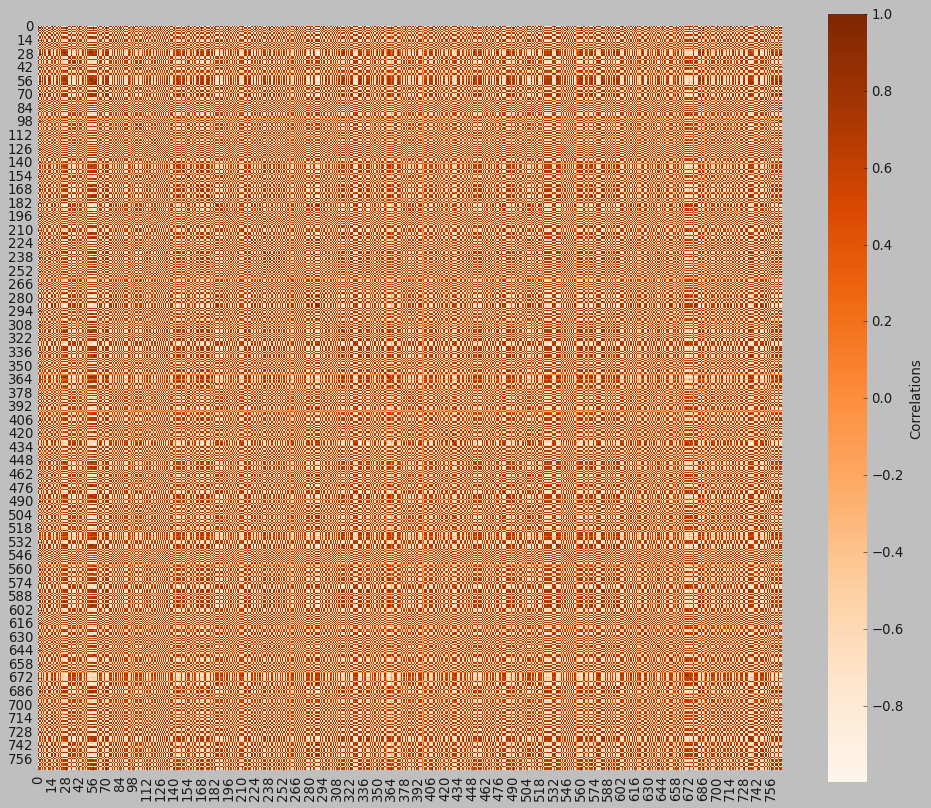

In [8]:
corr_matrix = embedding_text.corr()
plt.figure(figsize=(15, 12))


heat_map = sns.heatmap(corr_matrix, annot=False,square= True, cmap = "Oranges", cbar_kws={'label': 'Correlations'})
plt.savefig("corrtext.png", transparent = True)
plt.show()

[0.69452159 0.10615464 0.03474217]
[174.53640255  68.23585383  39.03656612]


C:\Users\desktop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
C:\Users\desktop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
C:\Users\desktop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
C:\Users\desktop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory lea

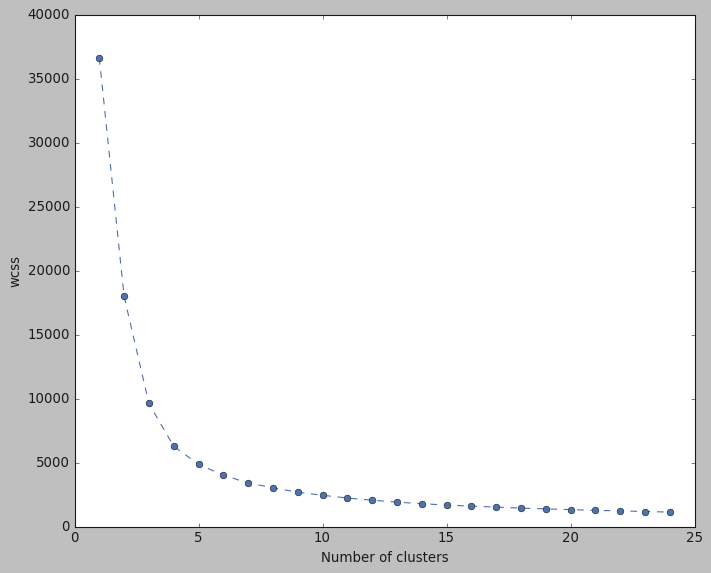

C:\Users\desktop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca =PCA(n_components=3).fit(array)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
text = pca.transform(array)
wcss = []
for i in range(1,25):
    kmean_pca = KMeans(n_clusters =i, init = 'k-means++', random_state=42)
    kmean_pca.fit(text)
    wcss.append(kmean_pca.inertia_)
plt.figure(figsize = (10,8))
plt.plot(range(1,25), wcss, marker = "o",linestyle='--')
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()
kmean_pca = KMeans(n_clusters =4, init = 'k-means++', random_state=42)
kmean_pca.fit(text)

In [10]:
data_embedding = pd.concat([data, pd.DataFrame(text)], axis =1)
data_embedding.columns.values[-3: ,] = ["Comp1_txt", "Comp2_txt", "Comp3_txt"]
data_embedding["cluster_txt"] = kmean_pca.labels_
data_embedding["segment"] = data_embedding["cluster_txt"].map({0:'first', 1:'second',2:'third',3:'fourth'})
data_embedding

Unnamed: 0                                     title  \
0           2512                             Doc Hollywood   
1           5795                            Ballets Russes   
2             38  Cirque du Freak: The Vampire's Assistant   
3           8056                                  Deadfall   
4           6753                                 They Live   
...          ...                                       ...   
3623         668                      Flags of Our Fathers   
3624         223                             Office Killer   
3625        4459                        He Was a Quiet Man   
3626        1517                   Dr. Jekyll and Ms. Hyde   
3627        5439                              Factory Girl   

                                                img_url  \
0     https://m.media-amazon.com/images/M/MV5BNTcwMj...   
1     https://m.media-amazon.com/images/M/MV5BMTIyND...   
2     https://m.media-amazon.com/images/M/MV5BMTI1ND...   
3     https://m.media-amazon.com/images/M/MV5BMTg2OD...   
4     https://m.media-amazon.com/images/M/MV5BMTQ3Mj...   
...                                                 ...   
3623  https://m.media-amazon.com/images/M/MV5BMTU2Mj...   
3624  https://m.media-amazon.com/images/M/MV5BNDg2NT...   
3625  https://m.media-amazon.com/images/M/MV5BMTUzMT...   
3626  https://m.media-amazon.com/images/M/MV5BMDc3Y2...   
3627  https://m.media-amazon.com/images/M/MV5BYTQ5ZT...   

                                            description  ratings   n_votes  \
0     Doc Hollywood: Directed by Michael Caton-Jones...      6.2   33519.0   
1     Ballets Russes: Directed by Daniel Geller, Day...      7.7     647.0   
2     Cirque du Freak: The Vampire's Assistant: Dire...      5.8   43497.0   
3     Deadfall: Directed by Jerry Hopper. With Van J...      7.7      16.0   
4     They Live: Directed by John Carpenter. With Ro...      7.3  111600.0   
...                                                 ...      ...       ...   
3623  Flags of Our Fathers: Directed by Clint Eastwo...      7.1  118129.0   
3624  Office Killer: Directed by Cindy Sherman. With...      5.1    1938.0   
3625  He Was a Quiet Man: Directed by Frank A. Cappe...      6.8   22004.0   
3626  Dr. Jekyll and Ms. Hyde: Directed by David Pri...      4.5    2653.0   
3627  Factory Girl: Directed by George Hickenlooper....      6.5   20789.0   

      production_year  runtime                         genres  release_year  \
0                1991      104       [Comedy, Drama, Romance]        1991.0   
1                2005      118  [Documentary, History, Music]        2005.0   
2                2009      119   [Action, Adventure, Fantasy]        2009.0   
3                1959       30                      [Western]        1993.0   
4                1988       94       [Action, Horror, Sci-Fi]        1988.0   
...               ...      ...                            ...           ...   
3623             2006      135     [Action, Adventure, Drama]        2006.0   
3624             1997       82        [Comedy, Crime, Horror]        1997.0   
3625             2007      100     [Drama, Romance, Thriller]        2007.0   
3626             1995      100      [Comedy, Romance, Sci-Fi]        1995.0   
3627             2006      100             [Biography, Drama]        2006.0   

      studio                                     img_embeddings  \
0         WB  [0.47755364, 0.8723433, 1.2153144, 0.3793078, ...   
1      Zeit.  [0.26525393, 2.4802532, 0.84571683, 0.21649377...   
2       Uni.  [0.06563655, 1.2579643, 0.25442713, 0.3307045,...   
3      Trim.  [0.23510928, 4.0279293, 0.6071904, 0.2641873, ...   
4       Uni.  [0.47165212, 1.9936308, 1.0524175, 0.4242929, ...   
...      ...                                                ...   
3623    P/DW  [0.25949064, 0.68048173, 0.008968297, 0.816912...   
3624  Strand  [0.3261535, 1.4046001, 0.28850305, 0.13665438,...   
3625  Mitro.  [0.37281433, 1.357696, 1.0473248, 0.39829102, ...

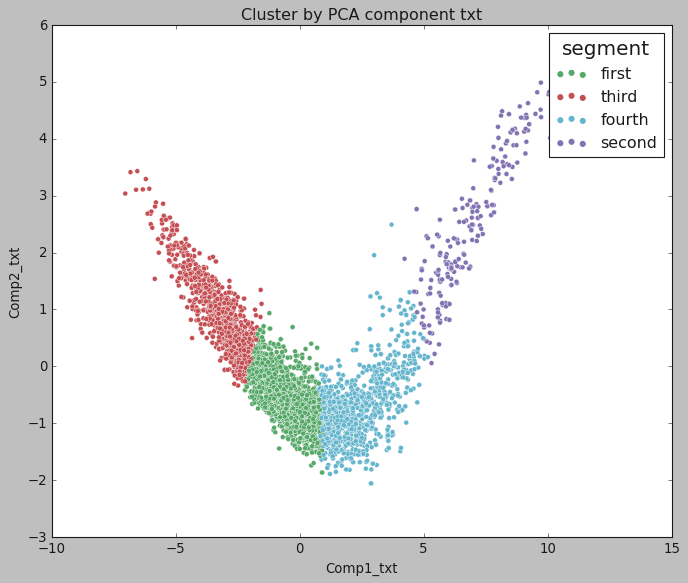

In [11]:
x_axis = data_embedding["Comp1_txt"]
y_axis = data_embedding["Comp2_txt"]
z_axis = data_embedding["Comp3_txt"]
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue =data_embedding["segment"], palette = ['g', 'r', 'c', 'm'])
plt.title("Cluster by PCA component txt")
plt.savefig("pcatext1.png", transparent = True)
plt.show()

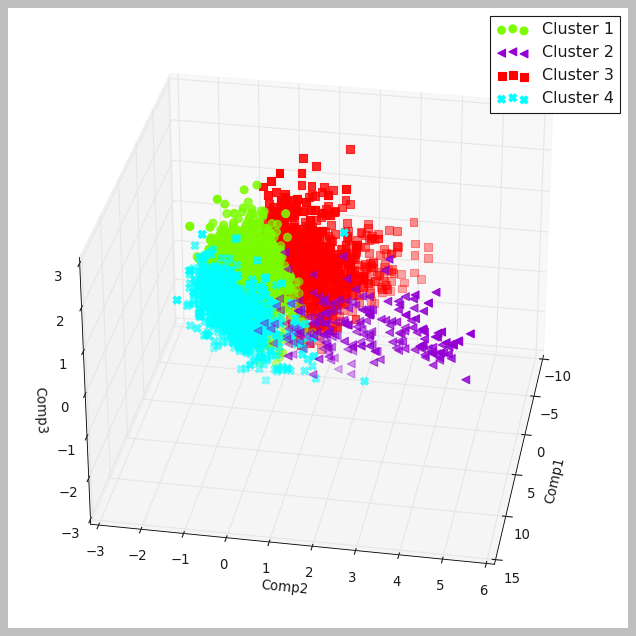

In [12]:
x1 = data_embedding[data_embedding['cluster_txt'] == 0]["Comp1_txt"]
y1 = data_embedding[data_embedding['cluster_txt'] == 0]["Comp2_txt"]
z1 = data_embedding[data_embedding['cluster_txt'] == 0]["Comp3_txt"]

x2 = data_embedding[data_embedding['cluster_txt'] == 1]["Comp1_txt"]
y2 = data_embedding[data_embedding['cluster_txt'] == 1]["Comp2_txt"]
z2 = data_embedding[data_embedding['cluster_txt'] == 1]["Comp3_txt"]

x3 = data_embedding[data_embedding['cluster_txt'] == 2]["Comp1_txt"]
y3 = data_embedding[data_embedding['cluster_txt'] == 2]["Comp2_txt"]
z3 = data_embedding[data_embedding['cluster_txt'] == 2]["Comp3_txt"]

x4 = data_embedding[data_embedding['cluster_txt'] == 3]["Comp1_txt"]
y4 = data_embedding[data_embedding['cluster_txt'] == 3]["Comp2_txt"]
z4 = data_embedding[data_embedding['cluster_txt'] == 3]["Comp3_txt"]

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 10)

ax.scatter3D(x1, y1, z1, s=50, color='lawngreen', marker='o', label='Cluster 1')
ax.scatter3D(x2, y2, z2, s=50, color='darkviolet', marker='<', label='Cluster 2')
ax.scatter3D(x3, y3, z3, s=50, color='red', marker = "s", label='Cluster 3')
ax.scatter3D(x4, y4, z4, s=50, color='cyan', marker = "X", label='Cluster 4')
ax.legend(loc=1)
ax.set_xlabel('Comp1')
ax.set_ylabel('Comp2')
ax.set_zlabel('Comp3')
plt.savefig("pcatext2.png", transparent = True)
plt.show()

In [13]:
array = []
img = pd.DataFrame(data["img_embeddings"])
for i in range(3628):
    array.append(literal_eval(img["img_embeddings"].iloc[i]))
array = np.array(array)
embedding_img = pd.DataFrame(array)

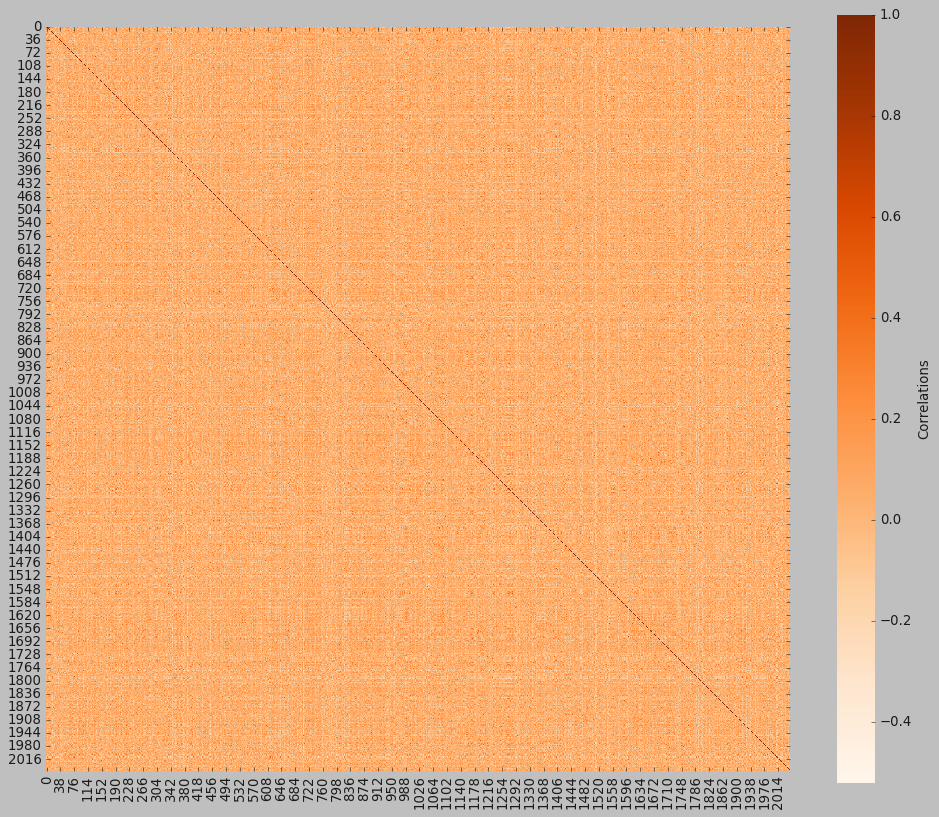

In [14]:
corr_matrix = embedding_img.corr()
plt.figure(figsize=(15, 12))


heat_map = sns.heatmap(corr_matrix, annot=False,square= True, cmap = "Oranges", cbar_kws={'label': 'Correlations'})
plt.savefig("corrimg.png", transparent = True)
plt.show()

In [15]:
standardized = StandardScaler().fit_transform(array)

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=1)

embs = tsne.fit_transform(standardized)

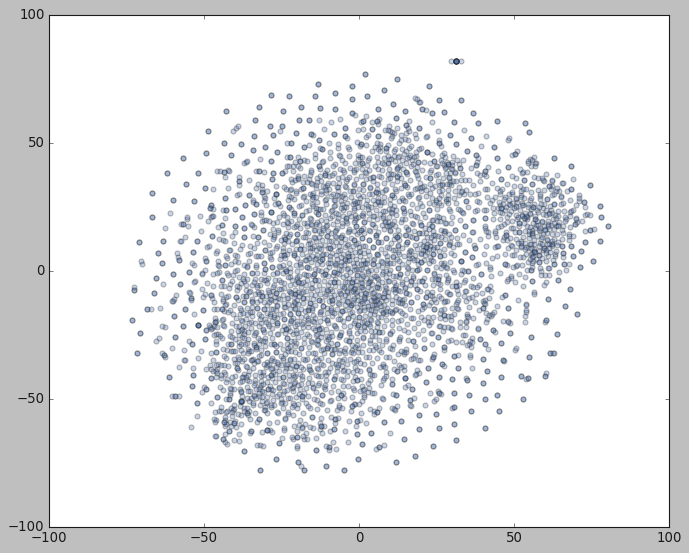

In [17]:
data_embedding['Dim1_img'] = embs[:, 0]
data_embedding['Dim2_img'] = embs[:, 1]
FS = (10, 8)
fig, ax = plt.subplots(figsize=FS)

ax.scatter(data_embedding.Dim1_img, data_embedding.Dim2_img, alpha=.3);
plt.savefig("tsneimg2.png", transparent = True)

In [18]:
df = data_embedding



def plot_bg(bg_alpha=.01, figsize=(13, 9), emb_2d=None):
    """Create and return a plot of all our movie embeddings with very low opacity.
    (Intended to be used as a basis for further - more prominent - plotting of a 
    subset of movies. Having the overall shape of the map space in the background is
    useful for context.)
    """
    if emb_2d is None:
        emb_2d = embs
    fig, ax = plt.subplots(figsize=figsize)
    X = emb_2d[:, 0]
    Y = emb_2d[:, 1]
    ax.scatter(X, Y, alpha=bg_alpha)
    return ax

def annotate_sample(n, n_ratings_thresh=0):
    """Plot our embeddings with a random sample of n movies annotated.
    Only selects movies where the number of ratings is at least n_ratings_thresh.
    """
    sample = data_embedding[data_embedding.n_ratings >= n_ratings_thresh].sample(
        n, random_state=1)
    plot_with_annotations(sample.index)

def plot_by_title_pattern(pattern, **kwargs):
    """Plot all movies whose titles match the given regex pattern.
    """
    match = df[df.title.str.contains(pattern)]
    return plot_with_annotations(match.index, **kwargs)

def add_annotations(ax, label_indices, emb_2d=None, **kwargs):
    if emb_2d is None:
        emb_2d = embs
    X = emb_2d[label_indices, 0]
    Y = emb_2d[label_indices, 1]
    ax.scatter(X, Y, **kwargs)

def plot_with_annotations(label_indices, text=True, labels=None, alpha=1, **kwargs):
    ax = plot_bg(**kwargs)
    Xlabeled = embs[label_indices, 0]
    Ylabeled = embs[label_indices, 1]
    if labels is not None:
        for x, y, label in zip(Xlabeled, Ylabeled, labels):
            ax.scatter(x, y, alpha=alpha, label=label, marker='1',
                       s=90,
                      )
        fig.legend()
    else:
        ax.scatter(Xlabeled, Ylabeled, alpha=alpha, color='orange')
    
    if text:
        # TODO: Add abbreviated title column
        titles = data_embedding.loc[label_indices, 'title'].values
        texts = []
        for label, x, y in zip(titles, Xlabeled, Ylabeled):
            t = ax.annotate(label, xy=(x, y))
            texts.append(t)
        adjust_text(texts, 
                    #expand_text=(1.01, 1.05),
                    arrowprops=dict(arrowstyle='->', color='red'),
                   )
    return ax

FS = (13, 9)
def plot_region(x0, x1, y0, y1, text=True):
    """Plot the region of the mapping space bounded by the given x and y limits.
    """
    fig, ax = plt.subplots(figsize=FS)
    pts = df[
        (df.x >= x0) & (df.x <= x1)
        & (df.y >= y0) & (df.y <= y1)
    ]
    ax.scatter(pts.x, pts.y, alpha=.6)
    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    if text:
        texts = []
        for label, x, y in zip(pts.title.values, pts.x.values, pts.y.values):
            t = ax.annotate(label, xy=(x, y))
            texts.append(t)
        adjust_text(texts, expand_text=(1.01, 1.05))
    return ax

def plot_region_around(title, margin=5, **kwargs):
    """Plot the region of the mapping space in the neighbourhood of the the movie with
    the given title. The margin parameter controls the size of the neighbourhood around
    the movie.
    """
    xmargin = ymargin = margin
    match = df[df.title == title]
    assert len(match) == 1
    row = match.iloc[0]
    return plot_region(row.x-xmargin, row.x+xmargin, row.y-ymargin, row.y+ymargin, **kwargs)

<AxesSubplot:>

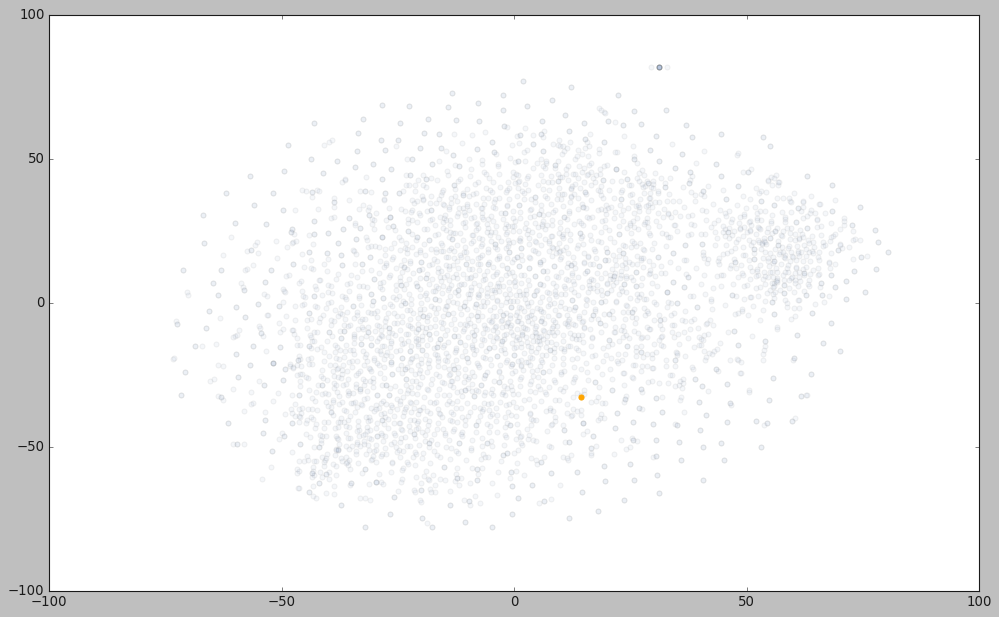

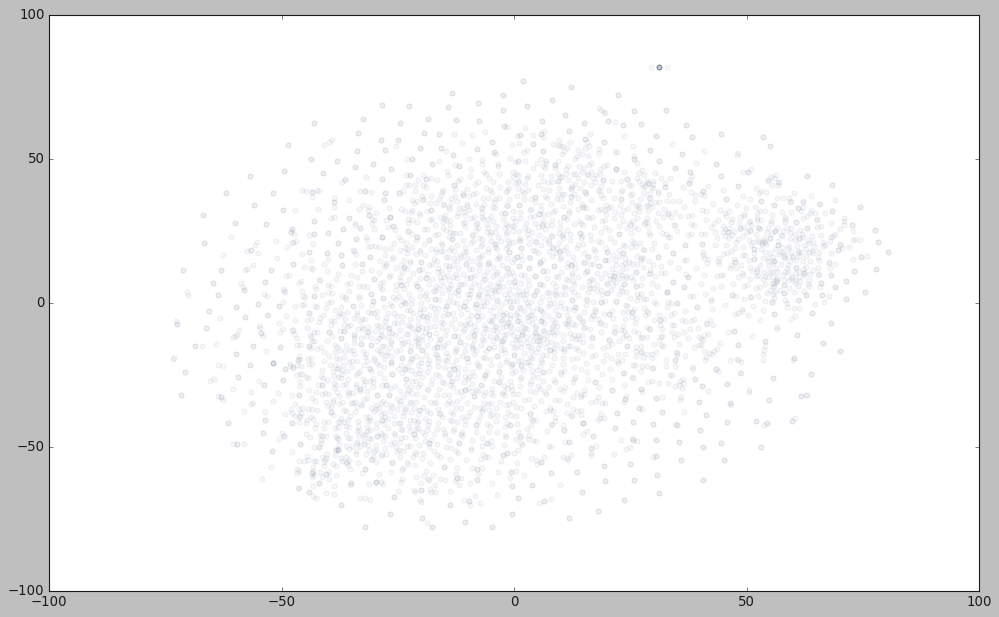

In [19]:
plot_by_title_pattern('Harry Potter', figsize=(15, 9), bg_alpha=.05, text=False)
plot_by_title_pattern('WB', figsize=(15, 9), bg_alpha=.05, text=False)

In [20]:
df["genres"].loc[1].index

<function list.index(value, start=0, stop=9223372036854775807, /)>

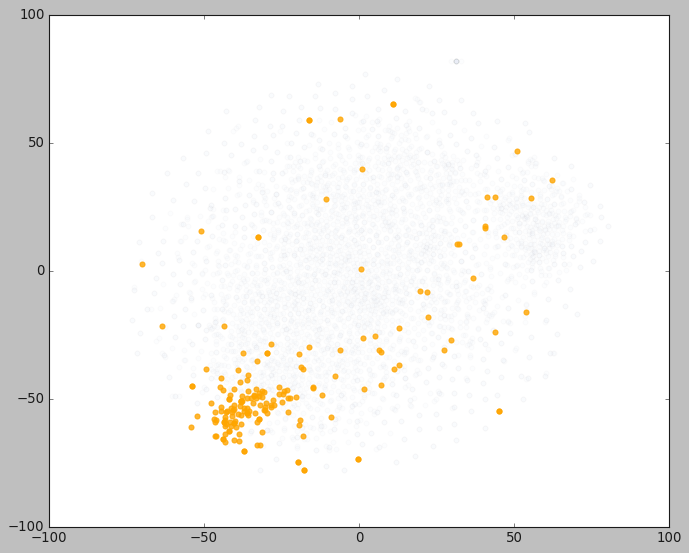

In [21]:
index = []
for  i in range(3628):
    if "Animation" in df["genres"].loc[i]:
        index.append(i)
plot_with_annotations(index, text=False, alpha=.8, figsize=(10, 8))
plt.savefig("tsneimg.png", transparent = True)

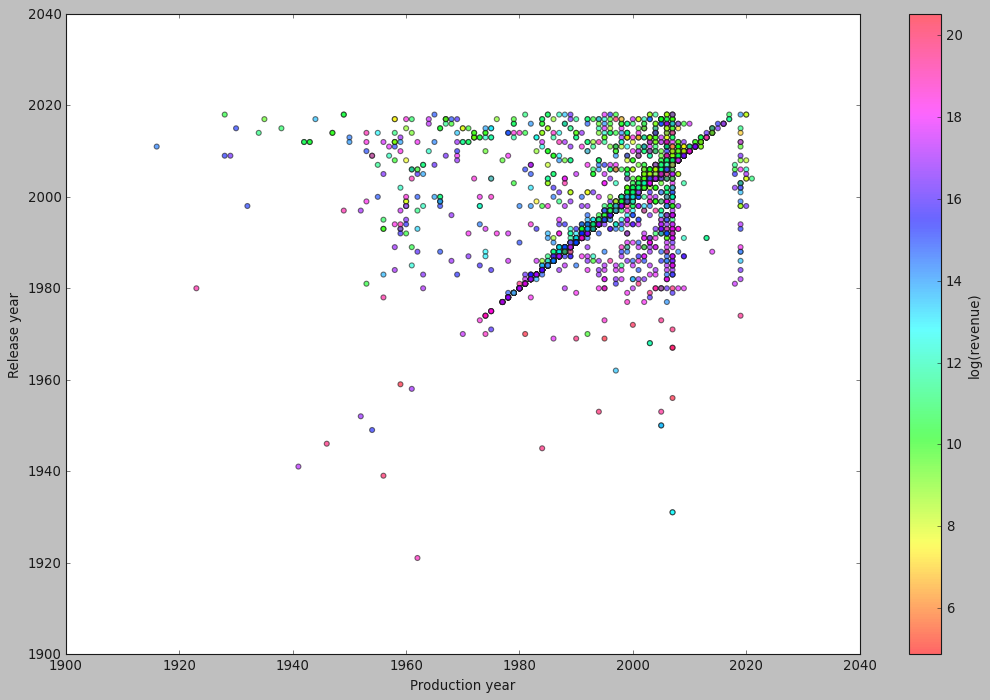

In [22]:
plt.figure(figsize=(16, 10))
Revenuel = np.log(data.Revenue)

plt.scatter(data.production_year,data.release_year, c = Revenuel, cmap='hsv', alpha = 0.6)
plt.colorbar(label = "log(revenue)")
plt.xlabel('Production year')
plt.ylabel('Release year')
plt.show()

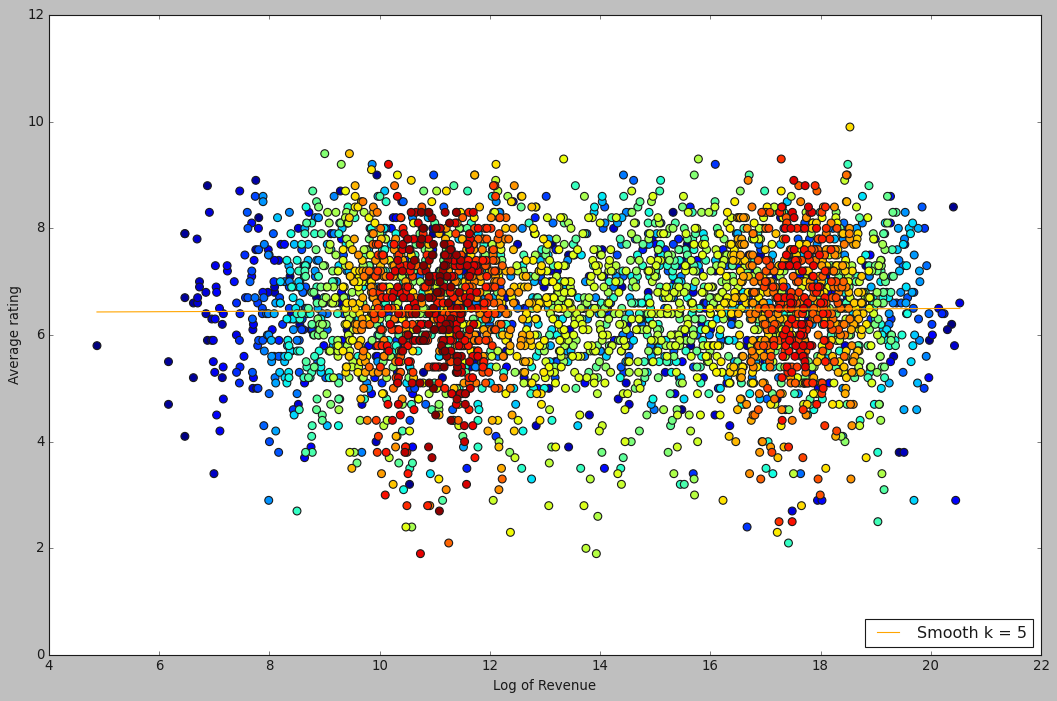

In [23]:
Revenuel = np.log(data.Revenue)

xy = np.vstack([data.ratings,Revenuel])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
data.ratings, Revenuel, z = data.ratings[idx], Revenuel[idx], z[idx]

sort_indexes  = sorted(range(len(Revenuel)), key=lambda k: Revenuel[k])
sorted_Revenuel = sorted(Revenuel)
    
coeff = np.polyfit(sorted_Revenuel, data.ratings, 1)
x = np.linspace(sorted_Revenuel[0], sorted_Revenuel[-1], num = 100)
Polynomial = np.polyval(coeff, x)

fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(Revenuel, data.ratings, c=z, s=50)
plt.plot(x, Polynomial, '-', label = 'Smooth k = 5', color='orange') 
plt.xlabel('Log of Revenue')
plt.legend(loc='lower right')
plt.ylabel('Average rating')
plt.show()

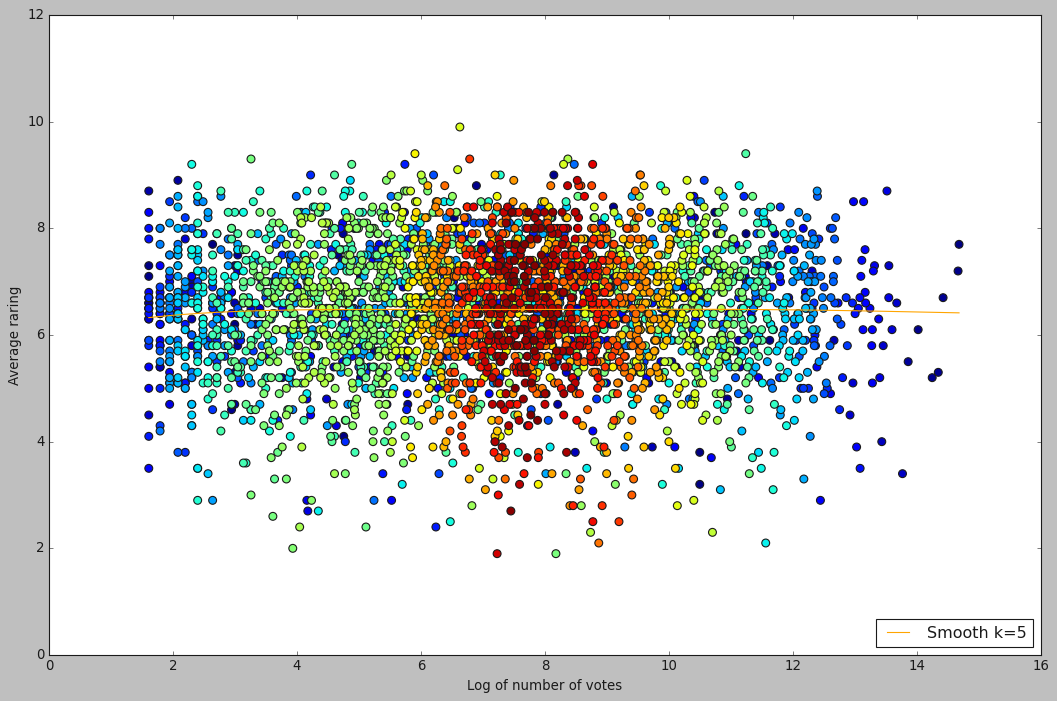

In [24]:
n_votesl = np.log(data.n_votes)

xy = np.vstack([data.ratings,n_votesl])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
data.ratings, n_votesl, z = data.ratings[idx], n_votesl[idx], z[idx]

sort_indexes  = sorted(range(len(n_votesl)), key=lambda k: n_votesl[k])
sorted_n_votesl = sorted(n_votesl)
    
coeff = np.polyfit(sorted_n_votesl, data.ratings, 5)
x = np.linspace(sorted_n_votesl[0], sorted_n_votesl[-1], num = 100)
Polynomial = np.polyval(coeff, x)


fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(n_votesl, data.ratings, c=z, s=50)
plt.plot(x, Polynomial, '-', label = 'Smooth k=5', color='orange') 
plt.xlabel('Log of number of votes')
plt.legend(loc='lower right')
plt.ylabel('Average raring')
plt.show()

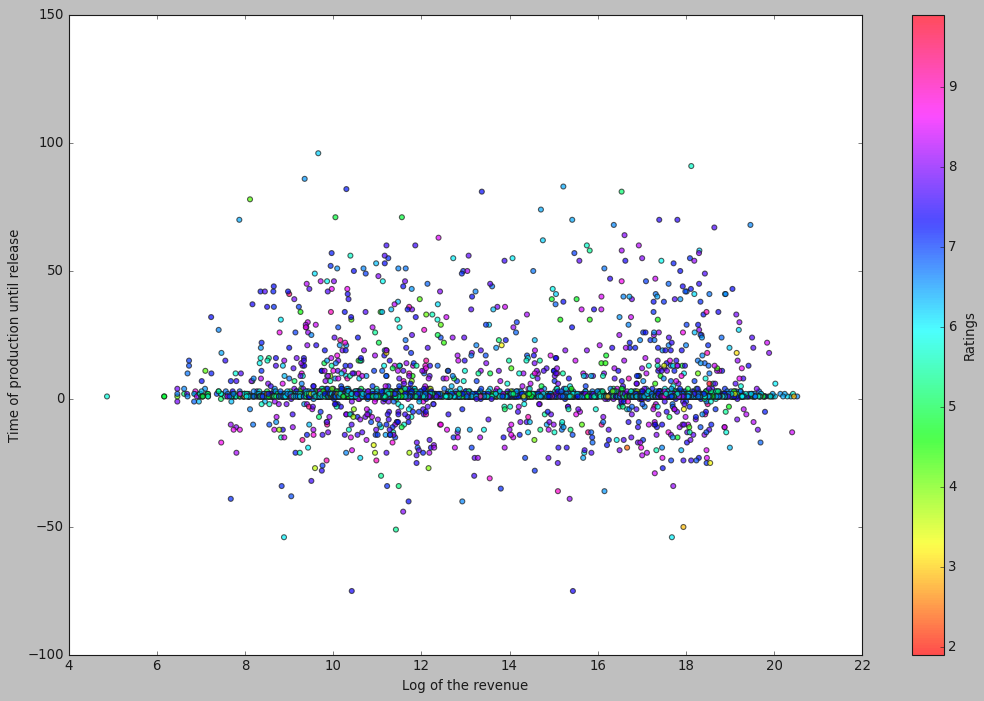

In [25]:
plt.figure(figsize=(16, 10))

plt.scatter(Revenuel,data.Time, c = data.ratings, cmap='hsv', alpha = 0.7)
plt.colorbar(label = "Ratings")
plt.xlabel('Log of the revenue')
plt.ylabel('Time of production until release')
plt.show()

C:\Users\desktop\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\desktop\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


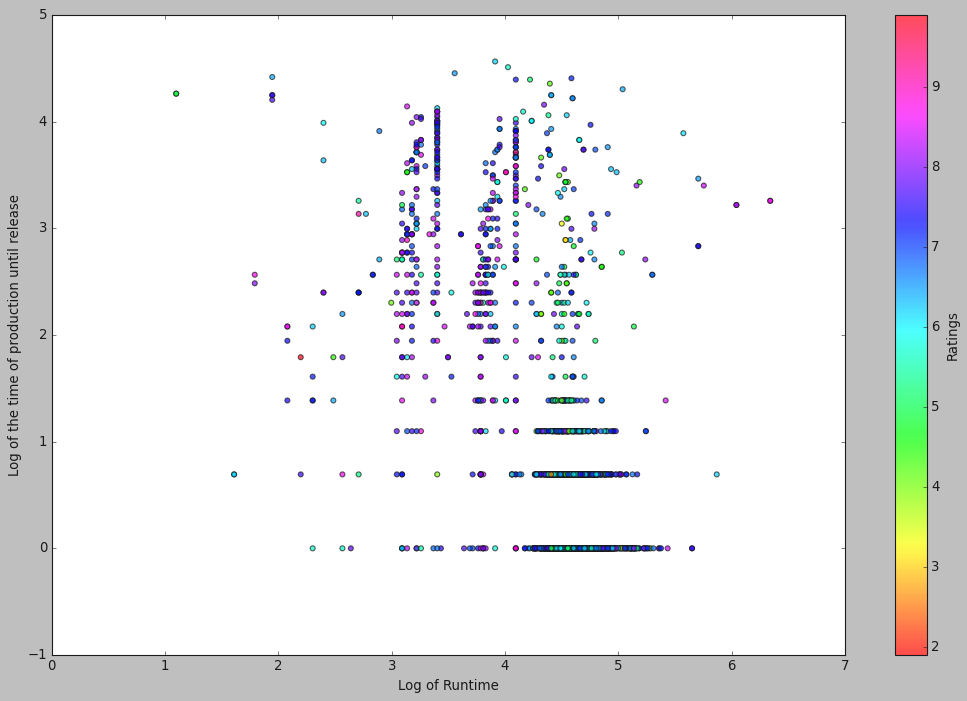

In [26]:
plt.figure(figsize=(16, 10))

runtimel = np.log(data.runtime)
timel = np.log(data.Time)

plt.scatter(runtimel,timel, c = data.ratings, cmap='hsv', alpha = 0.7)
plt.colorbar(label = "Ratings")
plt.xlabel('Log of Runtime')
plt.ylabel('Log of the time of production until release')
plt.show()

In [27]:
corr_matrix = dataindependent.corr()
plt.figure(figsize=(15, 12))


heat_map = sns.heatmap(corr_matrix, annot=False, cmap = "Oranges", cbar_kws={'label': 'Correlations'})
plt.savefig("corr1.png", transparent = True)
plt.show()

NameError: name 'dataindependent' is not defined

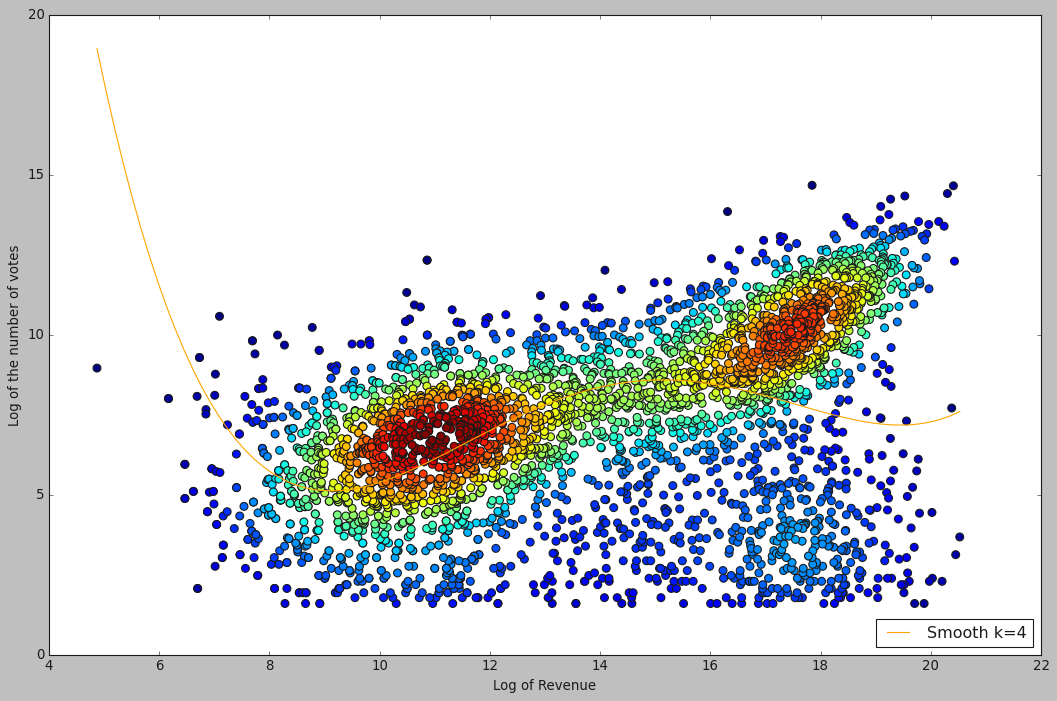

In [28]:
sns.set(style="ticks", context="talk")
plt.style.use('classic')

Revenuel = np.log(data.Revenue)
nvotesl = np.log(data.n_votes)

xy = np.vstack([nvotesl,Revenuel])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
nvotesl, Revenuel, z = nvotesl[idx], Revenuel[idx], z[idx]

sort_indexes  = sorted(range(len(Revenuel)), key=lambda k: Revenuel[k])
sorted_Revenuel = sorted(Revenuel)
    
coeff = np.polyfit(sorted_Revenuel, nvotesl, 4)
x = np.linspace(sorted_Revenuel[0], sorted_Revenuel[-1], num = 100)
Polynomial = np.polyval(coeff, x)

fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(Revenuel, nvotesl, c=z, s=50)
plt.plot(x, Polynomial, '-', label = 'Smooth k=4', color='orange') 
plt.xlabel('Log of Revenue')
plt.legend(loc='lower right')
plt.ylabel('Log of the number of votes')
plt.show()

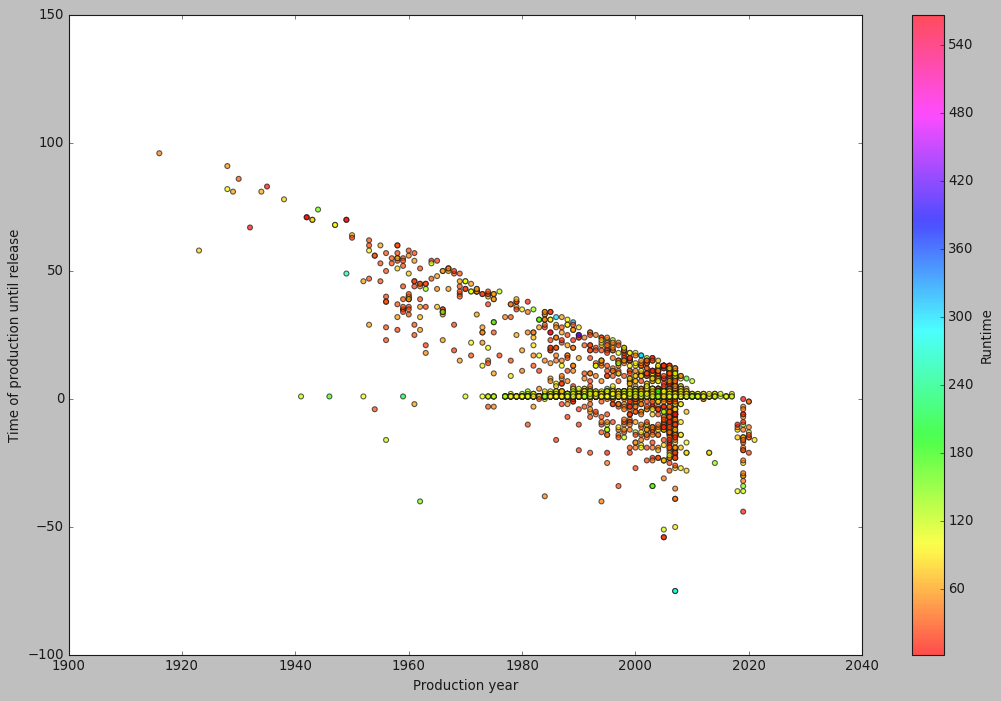

In [29]:
sns.set(style="ticks", context="talk")
plt.style.use('classic')

plt.figure(figsize=(16, 10))

plt.scatter(data.production_year,data.Time, c = data.runtime, cmap='hsv', alpha = 0.7)
plt.colorbar(label = "Runtime")

plt.xlabel('Production year')
plt.ylabel('Time of production until release')
plt.show()

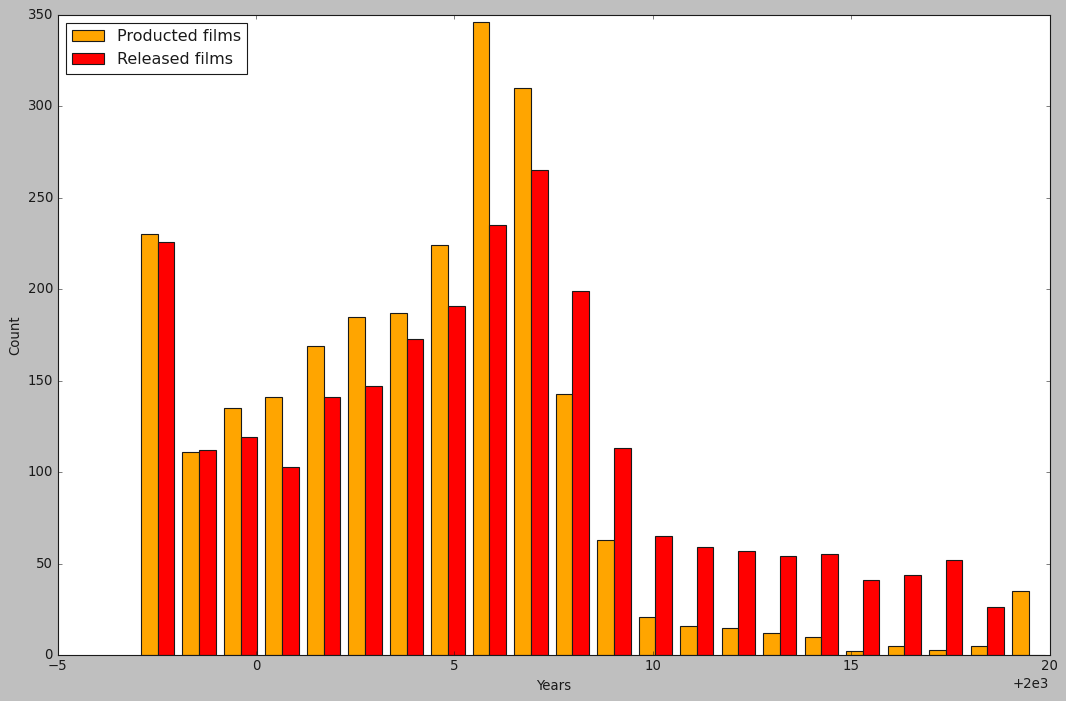

In [30]:
sns.set(style="ticks", context="talk")
plt.style.use('classic')
bins = np.linspace(1997, 2020, 23)
plt.figure(figsize=(16, 10))
plt.hist([data.production_year,data.release_year],bins,color=['Orange', 'Red'],
         label=["Producted films","Released films"])
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('Count')
plt.savefig("bar1.png", transparent = True)
plt.show()

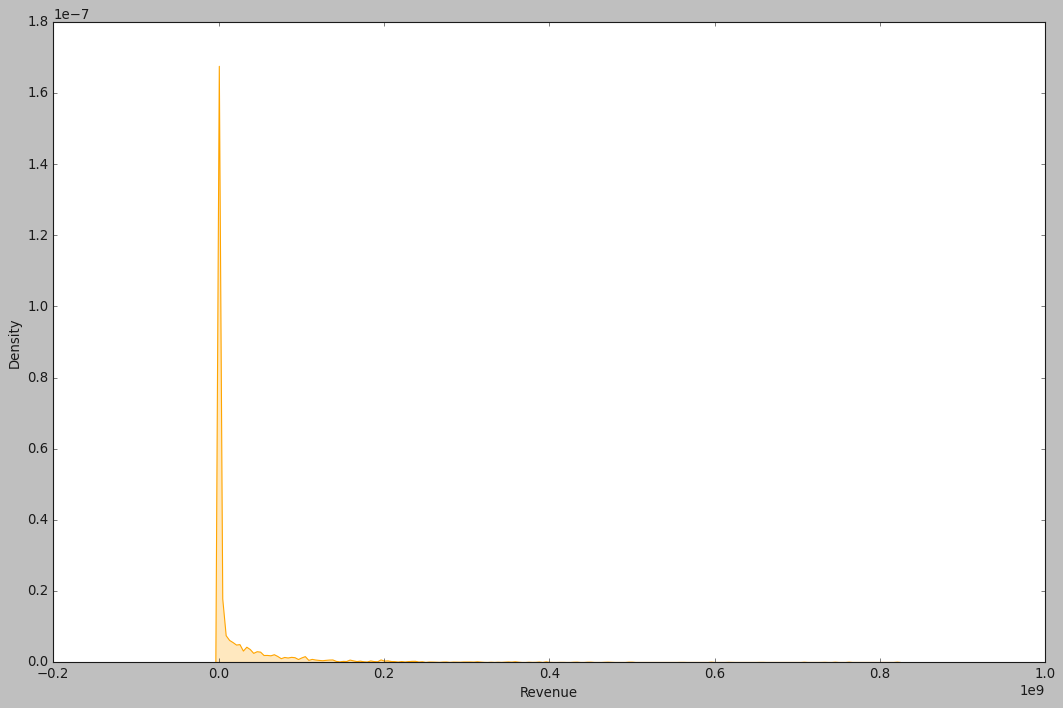

In [31]:
plt.figure(figsize=(16, 10))

sns.kdeplot(data.Revenue, bw_adjust=0.1, color = 'Orange', fill = True)
plt.savefig("density1.png", transparent = True)

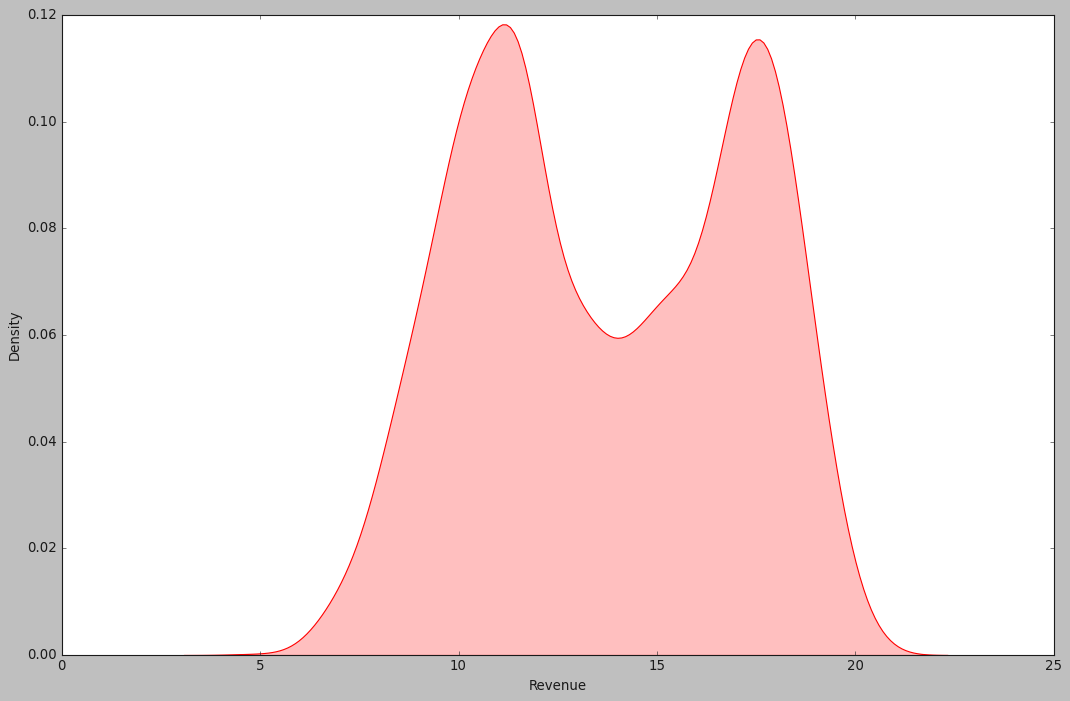

In [32]:
plt.figure(figsize=(16, 10))

sns.kdeplot(Revenuel, bw_adjust=0.9, color = 'Red', fill = True)
plt.savefig("density2.png", transparent = True)

In [33]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]
get_best_distribution(Revenuel)

p value for norm = 1.6305466367998526e-29


C:\Users\desktop\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1726: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


p value for exponweib = 0.0
p value for weibull_max = 0.0
p value for weibull_min = 0.0
p value for pareto = 0.0
p value for genextreme = 3.4329008693707346e-38
Best fitting distribution: norm
Best p value: 1.6305466367998526e-29
Parameters for the best fit: (13.722388583253084, 3.436826012846048)


C:\Users\desktop\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


('norm', 1.6305466367998526e-29, (13.722388583253084, 3.436826012846048))

No handles with labels found to put in legend.


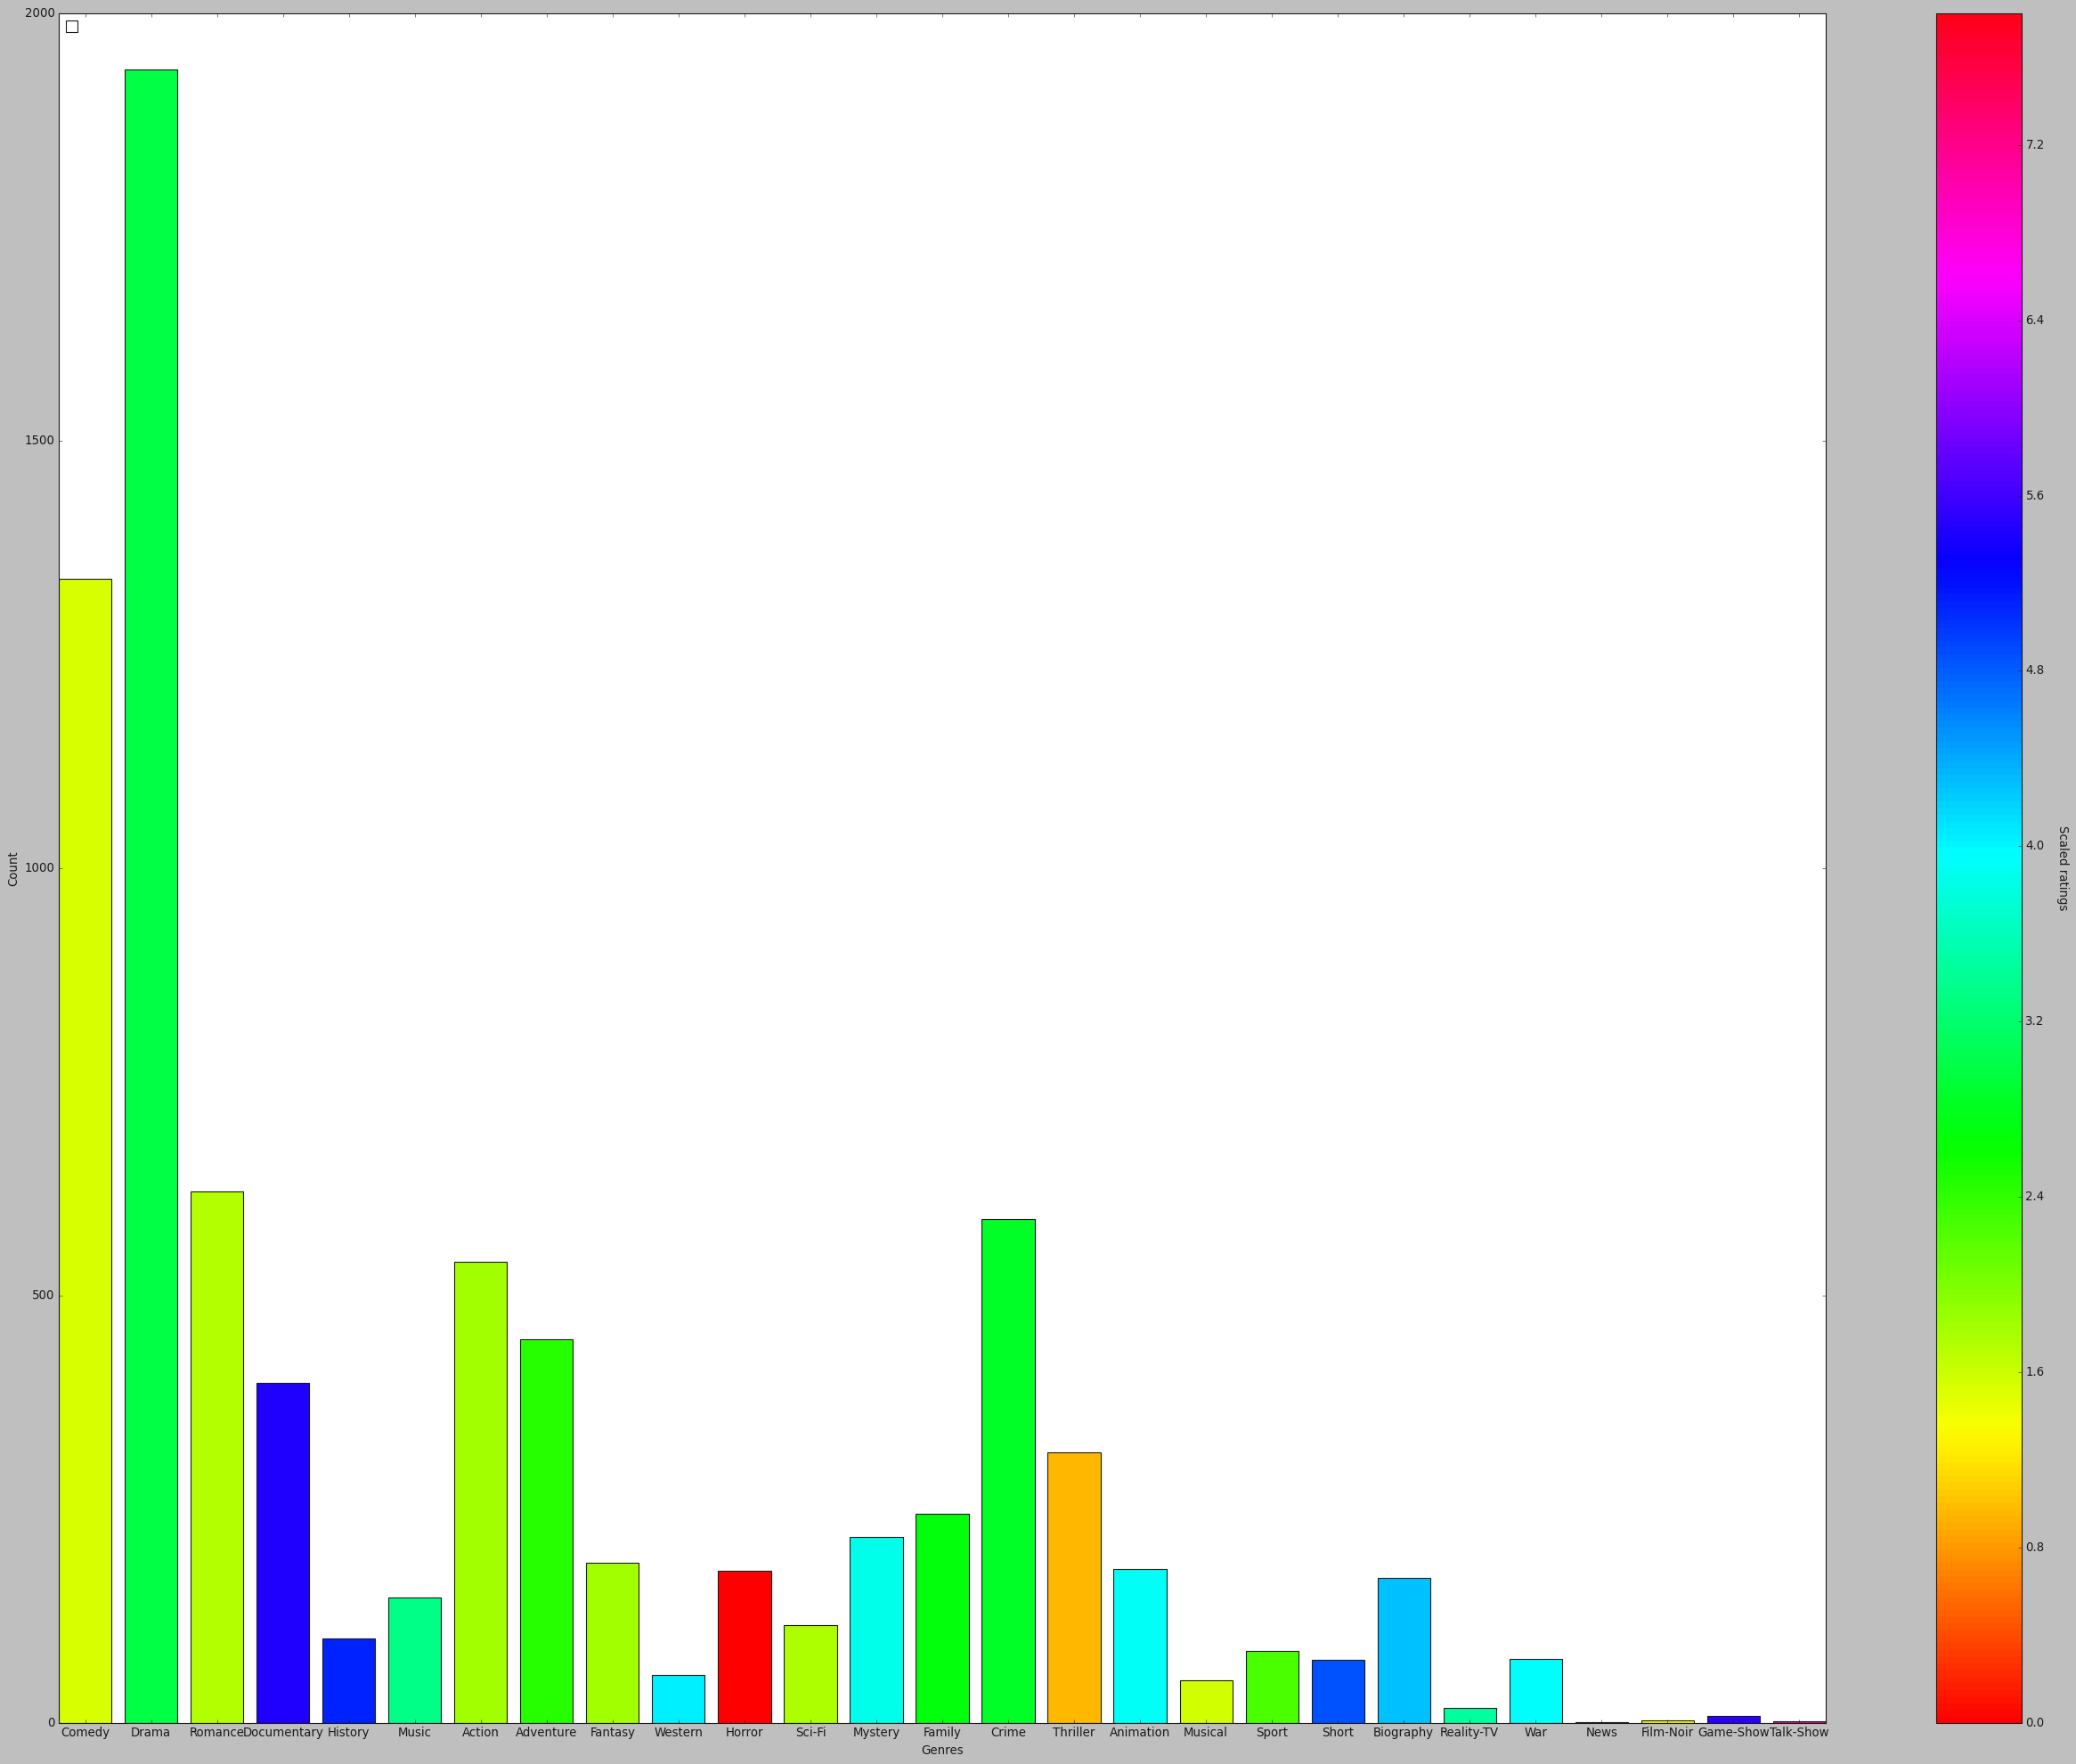

In [34]:
plt.figure(figsize=(40, 30))
genrescount = defaultdict(dict)

rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
my_cmap = plt.get_cmap("hsv")


for i in range(len(data)):
    for j in data.genres[i]:
        if j in genrescount:
            genrescount[j]['count'] += 1
            genrescount[j]['rating'] += data.ratings[i]
        else:
            genrescount[j]['count'] = 1
            genrescount[j]['rating'] = data.ratings[i]
for i in genrescount:
    genrescount[i]['rating'] = genrescount[i]['rating']/genrescount[i]['count']

genres = []
count = []
ratings = []

for key in genrescount.keys():
    genres.append(key)
    count.append(genrescount[key]['count'])
    ratings.append(genrescount[key]['rating'])

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(ratings)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Scaled ratings', rotation=270,labelpad=25)

plt.bar(genres, count, color = my_cmap(rescale(ratings)))
plt.legend(loc='upper left')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()

## Recode dummy for genre

In [35]:
genrescount.keys()
for i in genrescount.keys():
    data[i] = 0
for i in range(len(data)):
    for j in data.genres[i]:
        data.loc[i,j] = 1

In [36]:
DATAMLP = data.copy(deep=True)

In [37]:
datalinear = data.copy(deep = True)
del datalinear['title']
del datalinear['img_url']
del datalinear['description']
del datalinear['img_embeddings']
del datalinear['text_embeddings']


In [38]:
datalinear

Unnamed: 0  ratings   n_votes  production_year  runtime  \
0           2512      6.2   33519.0             1991      104   
1           5795      7.7     647.0             2005      118   
2             38      5.8   43497.0             2009      119   
3           8056      7.7      16.0             1959       30   
4           6753      7.3  111600.0             1988       94   
...          ...      ...       ...              ...      ...   
3623         668      7.1  118129.0             2006      135   
3624         223      5.1    1938.0             1997       82   
3625        4459      6.8   22004.0             2007      100   
3626        1517      4.5    2653.0             1995      100   
3627        5439      6.5   20789.0             2006      100   

                             genres  release_year  studio       Revenue  Time  \
0          [Comedy, Drama, Romance]        1991.0      WB  1.185182e+08   1.0   
1     [Documentary, History, Music]        2005.0   Zeit.  1.229829e+06   1.0   
2      [Action, Adventure, Fantasy]        2009.0    Uni.  1.903583e+07   1.0   
3                         [Western]        1993.0   Trim.  3.742445e+04  35.0   
4          [Action, Horror, Sci-Fi]        1988.0    Uni.  3.237387e+07   1.0   
...                             ...           ...     ...           ...   ...   
3623     [Action, Adventure, Drama]        2006.0    P/DW  4.907014e+07   1.0   
3624        [Comedy, Crime, Horror]        1997.0  Strand  1.395034e+05   1.0   
3625     [Drama, Romance, Thriller]        2007.0  Mitro.  3.452419e+03   1.0   
3626      [Comedy, Romance, Sci-Fi]        1995.0    Sav.  5.337487e+06   1.0   
3627             [Biography, Drama]        2006.0   MGM/W  2.446384e+06   1.0   

      ...  Musical  Sport  Short  Biography  Reality-TV  War  News  Film-Noir  \
0     ...        0      0      0          0           0    0     0          0   
1     ...        0      0      0          0           0    0     0          0   
2     ...        0      0      0          0           0    0     0          0   
3     ...        0      0      0          0           0    0     0          0   
4     ...        0      0      0          0           0    0     0          0   
...   ...      ...    ...    ...        ...         ...  ...   ...        ...   
3623  ...        0      0      0          0           0    0     0          0   
3624  ...        0      0      0          0           0    0     0          0   
3625  ...        0      0      0          0           0    0     0          0   
3626  ...        0      0      0          0           0    0     0          0   
3627  ...        0      0      0          1           0    0     0          0   

      Game-Show  Talk-Show  
0             0          0  
1             0          0  
2             0          0  
3             0          0  
4             0          0  
...         ...        ...  
3623          0          0  
3624          0          0  
3625          0          0  
3626          0          0  
3627          0          0  

[3628 rows x 37 columns]

## Check if we can recode studios levels

In [39]:
group = []
groups = datalinear.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) == 1:
         group.append(i)
dataindependent = datalinear.replace(group, "Independent")
group = []
groups = datalinear.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) <= 40:
         group.append(i)
dataindependent = dataindependent.replace(group, "Small")
group = []
groups = datalinear.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) <= 100:
         group.append(i)
dataindependent = dataindependent.replace(group, "Middle")
group = []
groups = datalinear.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) <= 200:
         group.append(i)
dataindependent = dataindependent.replace(group, "Leader")
print(dataindependent.groupby('studio').apply(len))



studio
Independent     188
Leader         1000
Middle          708
Small          1732
dtype: int64


## Dummy variables for studio

In [40]:
studio =  dataindependent['studio'].unique()
for i in studio:
    dataindependent[i] = 0
for i in range(len(dataindependent)):
        dataindependent.loc[i,dataindependent.studio[i]] = 1

<Figure size 2400x2400 with 0 Axes>

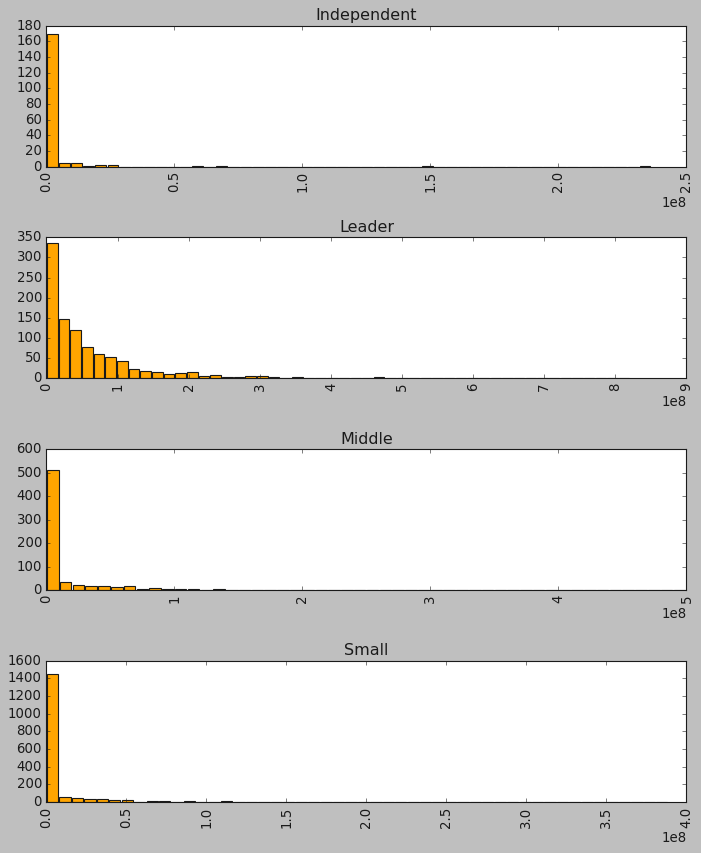

In [41]:
plt.figure(figsize=(30, 30))

dataindependent.hist(column = 'Revenue', by = 'studio', 
                     figsize=(10, 20), bins=50, color = 'Orange',
                    rwidth = 0.9, layout = (6,1), grid=False)
plt.savefig("barstud.png", transparent = True)
plt.show()

In [42]:
import researchpy as rp
import scipy.stats as stats
rp.summary_cont(dataindependent.groupby(["studio"])["Revenue"])

N          Mean            SD            SE     95% Conf.  \
studio                                                                      
Independent   188  4.129719e+06  2.158923e+07  1.574557e+06  1.023542e+06   
Leader       1000  6.727455e+07  9.911060e+07  3.134152e+06  6.112428e+07   
Middle        708  2.304262e+07  5.515449e+07  2.072833e+06  1.897297e+07   
Small        1732  9.050444e+06  3.277520e+07  7.875377e+05  7.505818e+06   

                 Interval  
studio                     
Independent  7.235895e+06  
Leader       7.342483e+07  
Middle       2.711226e+07  
Small        1.059507e+07

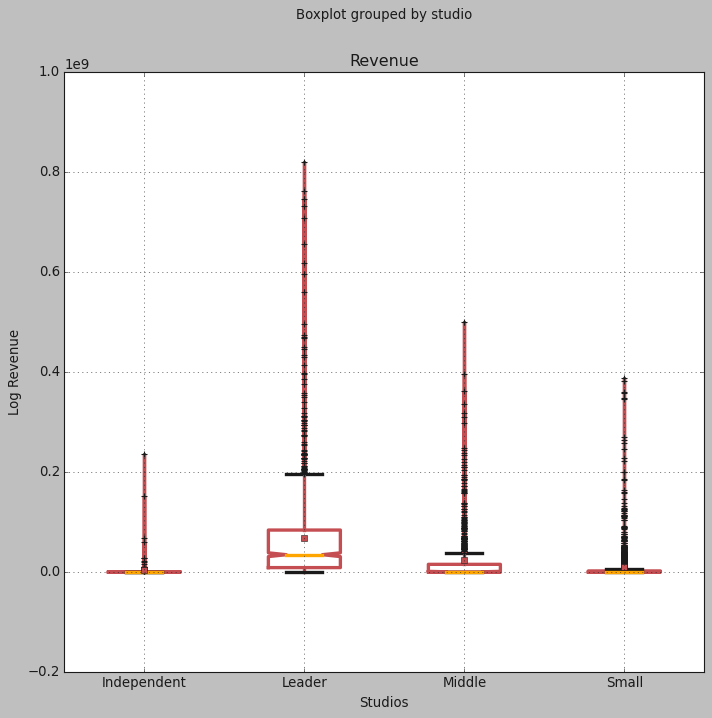

In [43]:
boxplot = dataindependent.boxplot(["Revenue"], by = ["studio"],
                                  boxprops=dict(linestyle='-', linewidth=3, color="r"),
                                  flierprops=dict(linestyle='-', linewidth=3,color="r"),
                                  medianprops=dict(linestyle='-', linewidth=3,color="orange"),
                                  whiskerprops=dict(linestyle='-', linewidth=3,color="r"),
                                  capprops=dict(linestyle='-', linewidth=3),
                     figsize = (10, 10),
                     showmeans = True,
                     notch = True)

boxplot.set_xlabel("Studios")
boxplot.set_ylabel("Log Revenue")
plt.savefig("boxstud.png", transparent = True)

## Linear model, Ridge,Lasso, Elasticnet

In [44]:
dataindependent = dataindependent.drop(['Leader', 'Small', 'Middle', 'Independent'], axis=1)
dataindependent

Unnamed: 0  ratings   n_votes  production_year  runtime  \
0           2512      6.2   33519.0             1991      104   
1           5795      7.7     647.0             2005      118   
2             38      5.8   43497.0             2009      119   
3           8056      7.7      16.0             1959       30   
4           6753      7.3  111600.0             1988       94   
...          ...      ...       ...              ...      ...   
3623         668      7.1  118129.0             2006      135   
3624         223      5.1    1938.0             1997       82   
3625        4459      6.8   22004.0             2007      100   
3626        1517      4.5    2653.0             1995      100   
3627        5439      6.5   20789.0             2006      100   

                             genres  release_year       studio       Revenue  \
0          [Comedy, Drama, Romance]        1991.0       Leader  1.185182e+08   
1     [Documentary, History, Music]        2005.0        Small  1.229829e+06   
2      [Action, Adventure, Fantasy]        2009.0       Leader  1.903583e+07   
3                         [Western]        1993.0        Small  3.742445e+04   
4          [Action, Horror, Sci-Fi]        1988.0       Leader  3.237387e+07   
...                             ...           ...          ...           ...   
3623     [Action, Adventure, Drama]        2006.0        Small  4.907014e+07   
3624        [Comedy, Crime, Horror]        1997.0       Middle  1.395034e+05   
3625     [Drama, Romance, Thriller]        2007.0  Independent  3.452419e+03   
3626      [Comedy, Romance, Sci-Fi]        1995.0        Small  5.337487e+06   
3627             [Biography, Drama]        2006.0        Small  2.446384e+06   

      Time  ...  Musical  Sport  Short  Biography  Reality-TV  War  News  \
0      1.0  ...        0      0      0          0           0    0     0   
1      1.0  ...        0      0      0          0           0    0     0   
2      1.0  ...        0      0      0          0           0    0     0   
3     35.0  ...        0      0      0          0           0    0     0   
4      1.0  ...        0      0      0          0           0    0     0   
...    ...  ...      ...    ...    ...        ...         ...  ...   ...   
3623   1.0  ...        0      0      0          0           0    0     0   
3624   1.0  ...        0      0      0          0           0    0     0   
3625   1.0  ...        0      0      0          0           0    0     0   
3626   1.0  ...        0      0      0          0           0    0     0   
3627   1.0  ...        0      0      0          1           0    0     0   

      Film-Noir  Game-Show  Talk-Show  
0             0          0          0  
1             0          0          0  
2             0          0          0  
3             0          0          0  
4             0          0          0  
...         ...        ...        ...  
3623          0          0          0  
3624          0          0          0  
3625          0          0          0  
3626          0          0          0  
3627          0          0          0  

[3628 rows x 37 columns]

In [45]:
dataindependent['studio'].replace(['Independent', 'Small', 'Middle', 'Leader'],
                        [0,1,2,3], inplace=True)
dataindependent

Unnamed: 0  ratings   n_votes  production_year  runtime  \
0           2512      6.2   33519.0             1991      104   
1           5795      7.7     647.0             2005      118   
2             38      5.8   43497.0             2009      119   
3           8056      7.7      16.0             1959       30   
4           6753      7.3  111600.0             1988       94   
...          ...      ...       ...              ...      ...   
3623         668      7.1  118129.0             2006      135   
3624         223      5.1    1938.0             1997       82   
3625        4459      6.8   22004.0             2007      100   
3626        1517      4.5    2653.0             1995      100   
3627        5439      6.5   20789.0             2006      100   

                             genres  release_year  studio       Revenue  Time  \
0          [Comedy, Drama, Romance]        1991.0       3  1.185182e+08   1.0   
1     [Documentary, History, Music]        2005.0       1  1.229829e+06   1.0   
2      [Action, Adventure, Fantasy]        2009.0       3  1.903583e+07   1.0   
3                         [Western]        1993.0       1  3.742445e+04  35.0   
4          [Action, Horror, Sci-Fi]        1988.0       3  3.237387e+07   1.0   
...                             ...           ...     ...           ...   ...   
3623     [Action, Adventure, Drama]        2006.0       1  4.907014e+07   1.0   
3624        [Comedy, Crime, Horror]        1997.0       2  1.395034e+05   1.0   
3625     [Drama, Romance, Thriller]        2007.0       0  3.452419e+03   1.0   
3626      [Comedy, Romance, Sci-Fi]        1995.0       1  5.337487e+06   1.0   
3627             [Biography, Drama]        2006.0       1  2.446384e+06   1.0   

      ...  Musical  Sport  Short  Biography  Reality-TV  War  News  Film-Noir  \
0     ...        0      0      0          0           0    0     0          0   
1     ...        0      0      0          0           0    0     0          0   
2     ...        0      0      0          0           0    0     0          0   
3     ...        0      0      0          0           0    0     0          0   
4     ...        0      0      0          0           0    0     0          0   
...   ...      ...    ...    ...        ...         ...  ...   ...        ...   
3623  ...        0      0      0          0           0    0     0          0   
3624  ...        0      0      0          0           0    0     0          0   
3625  ...        0      0      0          0           0    0     0          0   
3626  ...        0      0      0          0           0    0     0          0   
3627  ...        0      0      0          1           0    0     0          0   

      Game-Show  Talk-Show  
0             0          0  
1             0          0  
2             0          0  
3             0          0  
4             0          0  
...         ...        ...  
3623          0          0  
3624          0          0  
3625          0          0  
3626          0          0  
3627          0          0  

[3628 rows x 37 columns]

In [46]:
del dataindependent['genres']
datamixed = dataindependent.copy(deep=True)

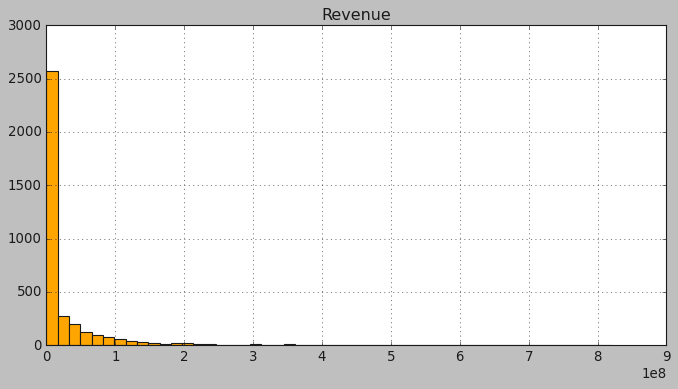

In [47]:
dataindependent.hist(column = 'Revenue', 
                     figsize=(10, 5), bins=50, color = 'Orange')
plt.show()

### Train and Test sets

In [48]:
dataindependent.Revenue = np.log(dataindependent.Revenue)
dataindependent

Unnamed: 0  ratings   n_votes  production_year  runtime  release_year  \
0           2512      6.2   33519.0             1991      104        1991.0   
1           5795      7.7     647.0             2005      118        2005.0   
2             38      5.8   43497.0             2009      119        2009.0   
3           8056      7.7      16.0             1959       30        1993.0   
4           6753      7.3  111600.0             1988       94        1988.0   
...          ...      ...       ...              ...      ...           ...   
3623         668      7.1  118129.0             2006      135        2006.0   
3624         223      5.1    1938.0             1997       82        1997.0   
3625        4459      6.8   22004.0             2007      100        2007.0   
3626        1517      4.5    2653.0             1995      100        1995.0   
3627        5439      6.5   20789.0             2006      100        2006.0   

      studio    Revenue  Time  Comedy  ...  Musical  Sport  Short  Biography  \
0          3  18.590577   1.0       1  ...        0      0      0          0   
1          1  14.022386   1.0       0  ...        0      0      0          0   
2          3  16.761833   1.0       0  ...        0      0      0          0   
3          1  10.530080  35.0       0  ...        0      0      0          0   
4          3  17.292862   1.0       0  ...        0      0      0          0   
...      ...        ...   ...     ...  ...      ...    ...    ...        ...   
3623       1  17.708761   1.0       0  ...        0      0      0          0   
3624       2  11.845844   1.0       1  ...        0      0      0          0   
3625       0   8.146830   1.0       0  ...        0      0      0          0   
3626       1  15.490266   1.0       1  ...        0      0      0          0   
3627       1  14.710121   1.0       0  ...        0      0      0          1   

      Reality-TV  War  News  Film-Noir  Game-Show  Talk-Show  
0              0    0     0          0          0          0  
1              0    0     0          0          0          0  
2              0    0     0          0          0          0  
3              0    0     0          0          0          0  
4              0    0     0          0          0          0  
...          ...  ...   ...        ...        ...        ...  
3623           0    0     0          0          0          0  
3624           0    0     0          0          0          0  
3625           0    0     0          0          0          0  
3626           0    0     0          0          0          0  
3627           0    0     0          0          0          0  

[3628 rows x 36 columns]

In [49]:
scaler = StandardScaler()
dataindependent2 = scaler.fit_transform(dataindependent.drop("Revenue", axis= 1))
dataindependentScaled = pd.DataFrame(dataindependent2, columns = dataindependent.drop("Revenue", axis= 1).columns.values)
X = dataindependentScaled
Y = dataindependent["Revenue"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

### Linear model

In [50]:
def fit_predict_with_features(X_train,Y_train, X_test, selected_features):
    X_train_filtered = X_train[selected_features]
    X_test_filtered = X_test[selected_features]
    
    linear_regression_m = LinearRegression()
    linear_regression_m.fit(X_train_filtered,Y_train)
    y_pred = linear_regression_m.predict(X_test_filtered)
    
    return y_pred

In [51]:
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
pred_train_lr= lr.predict(Xtrain)
print("RMSE for train")
print(compute_rmse(pred_train_lr,Ytrain))
print("Idem verif")
print(np.sqrt(mean_squared_error(Ytrain,pred_train_lr)))
print("R-squared for train")
print(r2_score(Ytrain, pred_train_lr))

pred_test_lr= lr.predict(Xtest)
print("RMSE for test")
print(np.sqrt(mean_squared_error(Ytest,pred_test_lr))) 
print("R-squared for test")
print(r2_score(Ytest, pred_test_lr))

RMSE for train
2.33056135728663
Idem verif
2.33056135728663
R-squared for train
0.5398224374940964
RMSE for test
2.4807184610019264
R-squared for test
0.48000793370766237


In [52]:
embedding_text = embedding_text.add_suffix('_txtemb')
embedding_text_scaled = scaler.fit_transform(embedding_text)
embedding_text = pd.DataFrame(embedding_text_scaled, columns = embedding_text.columns.values)

In [53]:
embedding_img = embedding_img.add_suffix('_imgemb')
embedding_img_scaled = scaler.fit_transform(embedding_img)
embedding_img = pd.DataFrame(embedding_img_scaled, columns = embedding_img.columns.values)

In [54]:
df_selection = dataindependentScaled.merge(embedding_text, how='outer', left_index=True, right_index=True)
df_selection = df_selection.merge(embedding_img, how='outer', left_index=True, right_index=True)

In [55]:
df_selection

Unnamed: 0   ratings   n_votes  production_year   runtime  release_year  \
0      -0.770304 -0.228691  0.081794        -0.557563  0.414345     -0.899632   
1       0.481414  1.043840 -0.233043         0.621738  0.784459      0.490472   
2      -1.713572 -0.568032  0.177360         0.958682  0.810896      0.887645   
3       1.343471  1.043840 -0.239087        -3.253109 -1.541972     -0.701046   
4       0.846673  0.704498  0.829628        -0.810271  0.149978     -1.197512   
...          ...       ...       ...              ...       ...           ...   
3623   -1.473370  0.534828  0.892161         0.705974  1.233884      0.589765   
3624   -1.643036 -1.161880 -0.220679        -0.052148 -0.167263     -0.303873   
3625   -0.027966  0.280322 -0.028493         0.790210  0.308598      0.689058   
3626   -1.149670 -1.670892 -0.213831        -0.220620  0.308598     -0.502459   
3627    0.345681  0.025815 -0.040130         0.705974  0.308598      0.589765   

        studio      Time    Comedy     Drama  ...  2038_imgemb  2039_imgemb  \
0     1.401927 -0.197431  1.307473  0.935898  ...    -0.717111    -0.547025   
1    -0.745958 -0.197431 -0.764834 -1.068493  ...    -0.759396    -0.746330   
2     1.401927 -0.197431 -0.764834 -1.068493  ...     0.114229     0.649824   
3    -0.745958  2.552197 -0.764834 -1.068493  ...     2.630955     0.145689   
4     1.401927 -0.197431 -0.764834 -1.068493  ...     0.982958     1.700188   
...        ...       ...       ...       ...  ...          ...          ...   
3623 -0.745958 -0.197431 -0.764834  0.935898  ...    -1.054656     1.667685   
3624  0.327985 -0.197431  1.307473 -1.068493  ...    -0.215427     2.091041   
3625 -1.819900 -0.197431 -0.764834  0.935898  ...    -1.128786     0.607930   
3626 -0.745958 -0.197431  1.307473 -1.068493  ...    -0.898320    -0.229956   
3627 -0.745958 -0.197431 -0.764834  0.935898  ...     1.379442    -0.450284   

      2040_imgemb  2041_imgemb  2042_imgemb  2043_imgemb  2044_imgemb  \
0        0.008966     1.553686    -1.007726    -0.205570    -0.182624   
1       -0.008755    -0.248438    -0.331177     0.222836    -0.194752   
2       -0.571823    -1.099592    -0.197891    -0.304978    -1.259233   
3       -1.294109     1.362781     1.316370    -0.061134     1.477954   
4       -0.759187     3.763598    -0.048009    -0.175720    -1.157167   
...           ...          ...          ...          ...          ...   
3623     0.822011    -0.728228    -1.103022    -0.498813    -1.112056   
3624     0.049616     0.166694    -0.280382    -0.045201     0.978592   
3625    -1.212640     3.006303    -0.455400     0.551803    -0.033062   
3626     0.274033    -0.953531    -0.497842     0.820815    -1.033986   
3627    -1.192089    -0.999800    -1.099528    -0.886497    -0.050167   

      2045_imgemb  2046_imgemb  2047_imgemb  
0        1.563608    -0.575971    -0.134689  
1        0.406343     0.680207     0.620242  
2       -1.016493    -0.878842     1.708620  
3       -0.919512    -1.021301    -0.196938  
4        0.068822     1.089310     1.174808  
...           ...          ...          ...  
3623     0.255966    -0.669021    -1.093030  
3624    -0.704212    -0.558778    -0.136593  
3625     0.008502    -0.905728     0.514212  
3626    -0.427775    -0.645301     0.741196  
3627    -0.580219    -0.792020    -1.002594  

[3628 rows x 2851 columns]

In [56]:
X_selec = df_selection
Y_selec = dataindependent["Revenue"]

X_train_selec, X_test_selec, y_train_selec, y_test_selec = train_test_split(X_selec, Y_selec, test_size=0.2, random_state=42)


print('Train', X_train_selec.shape, y_train_selec.shape)
print('Test', X_test_selec.shape, y_test_selec.shape)


Train (2902, 2851) (2902,)
Test (726, 2851) (726,)


In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs = SelectKBest(score_func=f_regression, k=35)

z = fs.fit_transform(X_train_selec, y_train_selec) 

print("After selecting best features:", z.shape)



After selecting best features: (2902, 35)


In [58]:
filter = fs.get_support()
features = df_selection.columns
print("All features:")
print(features)
print("Selected best :")
print(features[filter])

All features:
Index(['Unnamed: 0', 'ratings', 'n_votes', 'production_year', 'runtime',
       'release_year', 'studio', 'Time', 'Comedy', 'Drama',
       ...
       '2038_imgemb', '2039_imgemb', '2040_imgemb', '2041_imgemb',
       '2042_imgemb', '2043_imgemb', '2044_imgemb', '2045_imgemb',
       '2046_imgemb', '2047_imgemb'],
      dtype='object', length=2851)
Selected best :
Index(['Unnamed: 0', 'n_votes', 'production_year', 'release_year', 'studio',
       'Time', 'Documentary', 'Action', 'Adventure', 'Family', '90_txtemb',
       '318_txtemb', '359_txtemb', '374_txtemb', '397_txtemb', '526_txtemb',
       '546_txtemb', '555_txtemb', '644_txtemb', '665_txtemb', '759_txtemb',
       '402_imgemb', '409_imgemb', '516_imgemb', '526_imgemb', '832_imgemb',
       '961_imgemb', '1017_imgemb', '1112_imgemb', '1146_imgemb',
       '1169_imgemb', '1215_imgemb', '1459_imgemb', '1637_imgemb',
       '2003_imgemb'],
      dtype='object')


In [59]:
new_df_train = X_train_selec.iloc[:,fs.get_support()]
new_df_test = X_test_selec.iloc[:,fs.get_support()]
new_df_train

Unnamed: 0   n_votes  production_year  release_year    studio      Time  \
1462   -0.654778 -0.238742         0.284795     -0.005994  0.327985 -0.278302   
3090   -1.695271  0.053683         0.705974      0.589765  1.401927 -0.197431   
528    -1.297985 -0.108333         0.116323     -0.105287  1.401927 -0.197431   
176    -0.699768 -0.211455         0.200559      0.093299  0.327985 -0.116559   
929    -0.971234 -0.235333        -1.484157     -1.991857  1.401927 -0.197431   
...          ...       ...              ...           ...       ...       ...   
1130    1.130340 -0.228293        -0.726035     -1.098218  0.327985 -0.197431   
1294   -0.020341 -0.239183         0.621738      0.490472  1.401927 -0.197431   
860    -0.164843 -0.149143         0.537503      0.391179  0.327985 -0.197431   
3507    0.095185 -0.235869         0.621738      0.490472 -0.745958 -0.197431   
3174   -1.177121 -0.238962         0.621738      1.185524  1.401927  0.368669   

      Documentary    Action  Adventure    Family  ...  832_imgemb  961_imgemb  \
1462    -0.351027 -0.418175  -0.375818 -0.269111  ...    0.606858    1.787212   
3090    -0.351027 -0.418175  -0.375818 -0.269111  ...    1.373308    1.324355   
528     -0.351027 -0.418175  -0.375818 -0.269111  ...   -0.609938   -0.507576   
176     -0.351027 -0.418175  -0.375818 -0.269111  ...    0.885220    1.422626   
929     -0.351027 -0.418175  -0.375818 -0.269111  ...   -1.046223    0.959834   
...           ...       ...        ...       ...  ...         ...         ...   
1130    -0.351027 -0.418175  -0.375818 -0.269111  ...   -0.318226   -0.213106   
1294     2.848785 -0.418175  -0.375818 -0.269111  ...    0.513970   -1.070119   
860     -0.351027 -0.418175  -0.375818 -0.269111  ...    0.038564   -0.575381   
3507    -0.351027 -0.418175  -0.375818 -0.269111  ...    0.794898   -0.218113   
3174    -0.351027 -0.418175  -0.375818 -0.269111  ...    1.454680   -0.010287   

      1017_imgemb  1112_imgemb  1146_imgemb  1169_imgemb  1215_imgemb  \
1462    -0.117618     0.743704     3.338057    -1.570557     1.848800   
3090    -0.343160     1.956550    -0.130051     0.512840     0.734122   
528     -0.597240    -0.111769    -0.597727    -0.568740    -0.501446   
176      2.019746     0.442140     1.957080    -0.942330     0.763749   
929     -0.921694     0.491348    -0.058158     1.134740    -0.780394   
...           ...          ...          ...          ...          ...   
1130     0.292516    -1.110884    -0.886250     0.070215    -0.220789   
1294    -1.295297    -0.872577    -0.806033    -0.647483    -0.516989   
860      0.316246    -0.351553    -0.501584    -0.467526     0.989905   
3507     0.099167     0.107473    -0.984007     0.566701     0.504304   
3174     0.268705    -0.960172    -0.033517    -0.746579     2.822020   

      1459_imgemb  1637_imgemb  2003_imgemb  
1462     3.566588     0.738551     1.177602  
3090     0.754842    -0.244913    -1.269402  
528     -0.352300    -0.835917    -1.190762  
176     -0.011509     0.420475     1.223204  
929     -0.638485    -0.412726    -0.921272  
...           ...          ...          ...  
1130    -0.870953     1.490903    -0.598848  
1294    -0.876039    -0.279951    -0.079367  
860     -0.372770     0.206236     0.254036  
3507    -0.208264    -0.960040     1.710535  
3174    -1.075409    -0.462530     0.850923  

[2902 rows x 35 columns]

In [60]:
lr = LinearRegression()
lr.fit(new_df_train, y_train_selec)
pred_train_lr= lr.predict(new_df_train)
print("RMSE for train")
print(compute_rmse(pred_train_lr,y_train_selec))
print("R-squared for train")
print(r2_score(y_train_selec, pred_train_lr))

pred_test_lr= lr.predict(new_df_test)
print("RMSE for test")
print(np.sqrt(mean_squared_error(y_test_selec,pred_test_lr))) 
print("R-squared for test")
print(r2_score(y_test_selec, pred_test_lr))

RMSE for train
2.3057530399236668
R-squared for train
0.5495672737188981
RMSE for test
2.5025018591320394
R-squared for test
0.4708356500265848


Feature 0: 758.332641
Feature 1: 15.603074
Feature 2: 314.409527
Feature 3: 82.981690
Feature 4: 2.816997
Feature 5: 562.259678
Feature 6: 1209.995925
Feature 7: 81.226018
Feature 8: 36.704436
Feature 9: 4.839997
Feature 10: 0.448538
Feature 11: 109.586100
Feature 12: 0.139166
Feature 13: 0.133970
Feature 14: 85.519575
Feature 15: 99.987564
Feature 16: 14.819261
Feature 17: 0.087243
Feature 18: 2.570958
Feature 19: 18.634198
Feature 20: 1.386748
Feature 21: 40.558877
Feature 22: 6.693030
Feature 23: 1.917054
Feature 24: 11.459971
Feature 25: 0.011491
Feature 26: 4.900281
Feature 27: 0.748538
Feature 28: 0.327821
Feature 29: 0.039267
Feature 30: 1.971282
Feature 31: 0.663769
Feature 32: 4.958992
Feature 33: 0.000217
Feature 34: 4.928701
Feature 35: 0.076975
Feature 36: 0.136905
Feature 37: 1.159808
Feature 38: 0.742155
Feature 39: 3.866985
Feature 40: 4.499156
Feature 41: 1.192067
Feature 42: 3.135821
Feature 43: 0.045770
Feature 44: 12.816284
Feature 45: 6.380527
Feature 46: 3.316420
F

Feature 855: 0.011367
Feature 856: 0.088363
Feature 857: 4.070823
Feature 858: 4.319285
Feature 859: 4.611431
Feature 860: 0.019342
Feature 861: 3.807704
Feature 862: 5.916254
Feature 863: 1.088920
Feature 864: 14.922360
Feature 865: 2.212007
Feature 866: 0.845012
Feature 867: 3.688717
Feature 868: 2.097969
Feature 869: 0.155714
Feature 870: 0.605228
Feature 871: 2.009098
Feature 872: 0.184892
Feature 873: 0.080336
Feature 874: 24.315448
Feature 875: 5.303339
Feature 876: 0.814332
Feature 877: 2.511356
Feature 878: 2.870959
Feature 879: 16.463426
Feature 880: 16.490258
Feature 881: 3.576764
Feature 882: 0.014761
Feature 883: 2.407857
Feature 884: 0.006203
Feature 885: 13.088298
Feature 886: 0.000483
Feature 887: 2.554413
Feature 888: 0.042023
Feature 889: 3.158590
Feature 890: 5.114639
Feature 891: 0.230282
Feature 892: 7.902376
Feature 893: 29.674971
Feature 894: 0.021387
Feature 895: 1.531728
Feature 896: 25.795488
Feature 897: 2.611177
Feature 898: 1.085876
Feature 899: 2.892383
Fea

Feature 2354: 0.079474
Feature 2355: 0.124760
Feature 2356: 0.162453
Feature 2357: 0.637463
Feature 2358: 4.800302
Feature 2359: 10.099909
Feature 2360: 9.814245
Feature 2361: 0.015460
Feature 2362: 0.556921
Feature 2363: 1.438477
Feature 2364: 0.343691
Feature 2365: 1.667162
Feature 2366: 3.397631
Feature 2367: 0.148703
Feature 2368: 0.104421
Feature 2369: 22.808957
Feature 2370: 3.835683
Feature 2371: 1.799919
Feature 2372: 0.218125
Feature 2373: 16.818264
Feature 2374: 1.619701
Feature 2375: 0.000621
Feature 2376: 0.078432
Feature 2377: 2.493150
Feature 2378: 0.699583
Feature 2379: 0.042086
Feature 2380: 0.066523
Feature 2381: 2.394771
Feature 2382: 0.035503
Feature 2383: 2.134609
Feature 2384: 2.880034
Feature 2385: 8.413686
Feature 2386: 1.045272
Feature 2387: 0.329767
Feature 2388: 0.449374
Feature 2389: 22.842143
Feature 2390: 10.555495
Feature 2391: 0.028593
Feature 2392: 1.675751
Feature 2393: 6.238983
Feature 2394: 1.650771
Feature 2395: 3.660178
Feature 2396: 0.008406
Featur

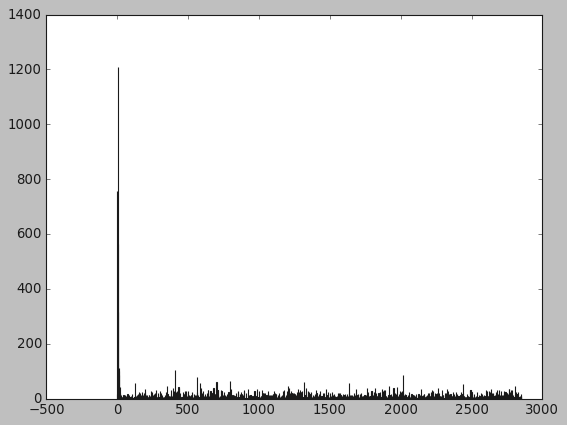

In [61]:
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.savefig("kbest.png", transparent = True)
plt.show()


In [62]:
import statsmodels.api as sm
def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [63]:
result = stepwise_selection(X_train_selec, y_train_selec)
print('resulting features:')
print(result)

C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  studio                         with p-value 6.96553e-222


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Unnamed: 0                     with p-value 1.15186e-116


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  release_year                   with p-value 9.78581e-55


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  n_votes                        with p-value 1.16823e-62


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  1215_imgemb                    with p-value 5.36067e-12


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  374_txtemb                     with p-value 3.04963e-11


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  759_txtemb                     with p-value 4.41933e-11


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  1146_imgemb                    with p-value 1.97722e-08


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Family                         with p-value 3.78229e-06


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  748_txtemb                     with p-value 1.95064e-05


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  1512_imgemb                    with p-value 7.46944e-05


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  2015_imgemb                    with p-value 0.000195327


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  146_txtemb                     with p-value 0.000271778


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  36_txtemb                      with p-value 0.000552284


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  682_imgemb                     with p-value 0.000753581


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  1821_imgemb                    with p-value 0.000270249


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  1860_imgemb                    with p-value 0.000805481


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  147_imgemb                     with p-value 0.00226812


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  321_imgemb                     with p-value 0.00271486


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  653_imgemb                     with p-value 0.0021257


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Biography                      with p-value 0.0036104


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Documentary                    with p-value 0.00205836


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  171_txtemb                     with p-value 0.000372644


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Action                         with p-value 0.00266654


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  521_imgemb                     with p-value 0.00315858


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  1222_imgemb                    with p-value 0.00371453


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  ratings                        with p-value 0.00338973


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Comedy                         with p-value 0.00358344


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  1449_imgemb                    with p-value 0.00550498


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  1756_imgemb                    with p-value 0.0049672


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  602_txtemb                     with p-value 0.00543984


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  436_txtemb                     with p-value 0.00215382


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  451_imgemb                     with p-value 0.00805082


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  105_imgemb                     with p-value 0.00746325


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  1233_imgemb                    with p-value 0.00384109


C:\Users\desktop\AppData\Local\Temp/ipykernel_4532/1982260545.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['studio', 'Unnamed: 0', 'release_year', 'n_votes', '1215_imgemb', '374_txtemb', '759_txtemb', '1146_imgemb', 'Family', '748_txtemb', '1512_imgemb', '2015_imgemb', '146_txtemb', '36_txtemb', '682_imgemb', '1821_imgemb', '1860_imgemb', '147_imgemb', '321_imgemb', '653_imgemb', 'Biography', 'Documentary', '171_txtemb', 'Action', '521_imgemb', '1222_imgemb', 'ratings', 'Comedy', '1449_imgemb', '1756_imgemb', '602_txtemb', '436_txtemb', '451_imgemb', '105_imgemb', '1233_imgemb']


In [64]:
new_df_train2 = X_train_selec[result]
new_df_test2 = X_test_selec[result]
new_df_train2

studio  Unnamed: 0  release_year   n_votes  1215_imgemb  374_txtemb  \
1462  0.327985   -0.654778     -0.005994 -0.238742     1.848800   -1.107056   
3090  1.401927   -1.695271      0.589765  0.053683     0.734122    1.296726   
528   1.401927   -1.297985     -0.105287 -0.108333    -0.501446    0.221295   
176   0.327985   -0.699768      0.093299 -0.211455     0.763749    0.110688   
929   1.401927   -0.971234     -1.991857 -0.235333    -0.780394   -1.058121   
...        ...         ...           ...       ...          ...         ...   
1130  0.327985    1.130340     -1.098218 -0.228293    -0.220789    2.621630   
1294  1.401927   -0.020341      0.490472 -0.239183    -0.516989   -0.344669   
860   0.327985   -0.164843      0.391179 -0.149143     0.989905   -0.586598   
3507 -0.745958    0.095185      0.490472 -0.235869     0.504304   -1.425715   
3174  1.401927   -1.177121      1.185524 -0.238962     2.822020   -1.373395   

      759_txtemb  1146_imgemb    Family  748_txtemb  ...  1222_imgemb  \
1462    0.502188     3.338057 -0.269111   -0.226069  ...     1.164165   
3090    0.647689    -0.130051 -0.269111   -0.295623  ...     0.385199   
528    -0.308319    -0.597727 -0.269111    0.553231  ...    -0.395772   
176     1.663970     1.957080 -0.269111   -1.039474  ...    -0.455782   
929     0.491045    -0.058158 -0.269111    0.655096  ...     1.557550   
...          ...          ...       ...         ...  ...          ...   
1130    2.013825    -0.886250 -0.269111   -1.037473  ...    -0.798283   
1294    0.603635    -0.806033 -0.269111   -1.343414  ...    -1.260685   
860    -0.160129    -0.501584 -0.269111   -0.476120  ...    -0.424428   
3507    0.584348    -0.984007 -0.269111    1.548240  ...    -0.306363   
3174   -1.271582    -0.033517 -0.269111    0.734222  ...    -0.170669   

       ratings    Comedy  1449_imgemb  1756_imgemb  602_txtemb  436_txtemb  \
1462  0.449992 -0.764834     0.418756    -0.423970   -1.125751   -0.144588   
3090 -1.161880 -0.764834    -1.057452     2.798800   -0.431765   -0.456591   
528   0.195486 -0.764834    -0.868784    -1.271018   -0.519799   -0.456633   
176   0.280322  1.307473     0.114328     0.338791   -1.192050   -1.176326   
929  -0.398361  1.307473    -0.027885    -1.039583    0.758415    0.136146   
...        ...       ...          ...          ...         ...         ...   
1130 -0.737703  1.307473     0.835503     0.025889   -1.781134   -1.080081   
1294 -0.652868 -0.764834    -1.207314    -1.182040   -1.099741   -0.605118   
860   0.534828  1.307473    -0.358643    -0.275849   -0.361357   -0.648557   
3507 -0.483197  1.307473    -0.326864     0.253665    2.667728    1.867440   
3174 -0.228691 -0.764834     1.405624    -0.838726    0.276097    0.208903   

      451_imgemb  105_imgemb  1233_imgemb  
1462   -0.607925   -0.620987     3.077238  
3090    2.315740    0.710303     2.905196  
528    -0.630265   -0.534258    -0.597999  
176    -0.972879   -0.491455    -0.592114  
929    -0.809468   -1.276387    -0.616413  
...          ...         ...          ...  
1130    0.767772   -1.152982    -0.267548  
1294   -0.648887   -0.733011    -1.065710  
860    -0.220379   -0.863082    -0.793834  
3507   -0.466414   -0.637982     0.007216  
3174   -0.943681   -0.080237    -0.742539  

[2902 rows x 35 columns]

In [65]:
lr = LinearRegression()
lr.fit(new_df_train2, y_train_selec)
pred_train_lr= lr.predict(new_df_train2)
print("RMSE for train")
print(compute_rmse(pred_train_lr,y_train_selec))
print("Idem verif")
print(np.sqrt(mean_squared_error(y_train_selec,pred_train_lr)))
print("R-squared for train")
print(r2_score(y_train_selec, pred_train_lr))

pred_test_lr= lr.predict(new_df_test2)
print("RMSE for test")
print(np.sqrt(mean_squared_error(y_test_selec,pred_test_lr))) 
print("R-squared for test")
print(r2_score(y_test_selec, pred_test_lr))

RMSE for train
2.225961141686235
Idem verif
2.225961141686235
R-squared for train
0.5802028225293507
RMSE for test
2.512941559690463
R-squared for test
0.4664114053435784


### Ridge

In [66]:
dataindependent3 = dataindependent.merge(embedding_text, how='outer', left_index=True, right_index=True)
dataindependent3 = dataindependent.merge(embedding_img, how='outer', left_index=True, right_index=True)

X = dataindependent3.drop("Revenue", axis= 1)
Y = dataindependent3["Revenue"]

X_train_rid, X_test_rid, y_train_rid, y_test_rid = train_test_split(X, Y, test_size=0.2, random_state=42)

In [67]:
from pylab import *
from patsy import dmatrices

dataindependent2= dataindependent.drop("Revenue", axis=1)

vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dataindependentScaled.values,i) for i in range(dataindependentScaled.shape[1])]
vif["features"]=dataindependentScaled.columns
vif

C:\Users\desktop\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor         features
0     1.086544       Unnamed: 0
1     1.305847          ratings
2     1.184151          n_votes
3          inf  production_year
4     1.467587          runtime
5          inf     release_year
6     1.216672           studio
7          inf             Time
8     1.768464           Comedy
9     1.987888            Drama
10    1.208797          Romance
11    2.152942      Documentary
12    1.114764          History
13    1.078154            Music
14    1.375904           Action
15    1.396807        Adventure
16    1.096782          Fantasy
17    1.176148          Western
18    1.160888           Horror
19    1.099816           Sci-Fi
20    1.128385          Mystery
21    1.142402           Family
22    1.269952            Crime
23    1.240817         Thriller
24    1.267703        Animation
25    1.024155          Musical
26    1.042061            Sport
27    1.168106            Short
28    1.114456        Biography
29    1.159376       Reality-TV
30    1.054552              War
31    1.004147             News
32    1.023133        Film-Noir
33    1.135915        Game-Show
34    1.015065        Talk-Show

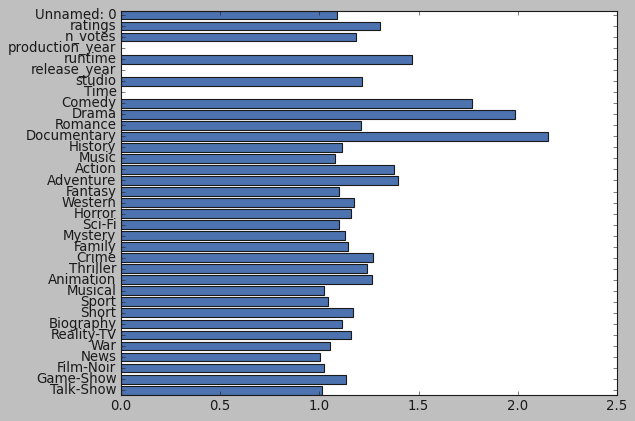

In [68]:
fig, ax = plt.subplots()

ax.barh(vif["features"],vif["VIF Factor"], align='center')
ax.invert_yaxis()
plt.savefig("VIF.png", transparent = True)

plt.show()

In [69]:
y_train_selec_sacled = (y_train_selec - y_train_selec.mean())/(y_train_selec.std())
y_train_selec_sacled

1462    0.199421
3090    1.057953
528     0.976435
176     0.212773
929     0.835919
          ...   
1130   -0.625416
1294    1.357764
860    -0.265978
3507   -0.734882
3174    1.321359
Name: Revenue, Length: 2902, dtype: float64

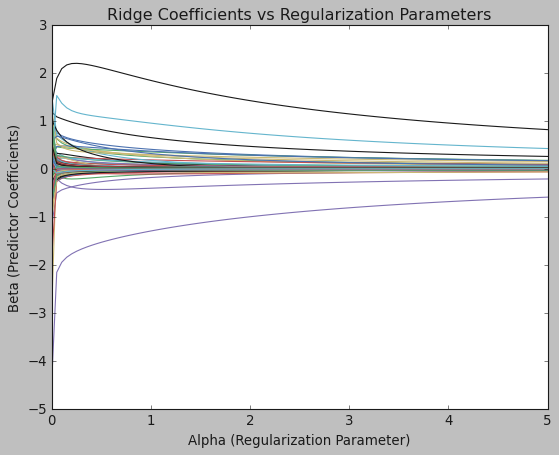

In [70]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
coef=[]
alphas = np.linspace(0.001,5,100)

for a in alphas:
  ridgereg=Ridge(alpha=a,fit_intercept=True, normalize=True)
  ridgereg.fit(X_train_rid,y_train_rid)
  coef.append(ridgereg.coef_)
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')
plt.savefig("Ridge.png", transparent = True)

plt.show()

In [71]:
from statsmodels.tools.tools import pinv_extended
import statsmodels.api as sm
import sklearn, statsmodels

def regression_analysis(X, y, model):
    
    is_statsmodels = False
    is_sklearn = False
    
    # check for accepted linear models
    if type(model) in [sklearn.linear_model._base.LinearRegression,
                       sklearn.linear_model._ridge.Ridge,
                       sklearn.linear_model._ridge.RidgeCV,
                       sklearn.linear_model._coordinate_descent.Lasso,
                       sklearn.linear_model._coordinate_descent.LassoCV,
                       sklearn.linear_model._coordinate_descent.ElasticNet,
                       sklearn.linear_model._coordinate_descent.ElasticNetCV,
                      ]:
        is_sklearn = True
    elif type(model) in [statsmodels.regression.linear_model.OLS, 
                         statsmodels.base.elastic_net.RegularizedResults,
                        ]:
        is_statsmodels = True
    else:
        print("Only linear models are supported!")
        return None
    
    
    
    has_intercept = False
    
    if is_statsmodels and all(np.array(X)[:,0]==1):
        # statsmodels add_constant has been used already
        has_intercept = True  
    elif is_sklearn and model.intercept_:
        has_intercept = True
        

    
    if is_statsmodels:
        # add_constant has been used already
        x = X
        model_params = model.params
    else: # sklearn model
        if has_intercept:
            x = sm.add_constant(X)
            model_params = np.hstack([np.array([model.intercept_]), model.coef_])
        else:
            x = X
            model_params = model.coef_
        
    #y = np.array(y).ravel()
    
    # define the OLS model
    olsModel = sm.OLS(y, x)
    
    pinv_wexog,_ = pinv_extended(x)
    normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))
    
    
    return sm.regression.linear_model.OLSResults(olsModel, model_params, normalized_cov_params)
    

In [72]:
Rid = Ridge(alpha=0.08, fit_intercept=True, normalize=True)
Rid.fit(X_train_rid, y_train_rid)
Rid.get_params(deep=True)
result = regression_analysis(X_train_rid, y_train_rid, Rid)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     1.295
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           7.25e-06
Time:                        11:27:01   Log-Likelihood:                -5585.6
No. Observations:                2902   AIC:                         1.534e+04
Df Residuals:                     819   BIC:                         2.778e+04
Df Model:                        2082                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             174.3790     27.090      6.437      0.000     121.206     227.552
Unnamed: 0         -0.0003   3.93e-05     -7.860      0.000      -0.000      -0.000
ratings             0.1409      0.135      1.041      0.298      -0.125       0.406
n_votes          6.629e-06    1.7e-06      3.905      0.000     3.3e-06    9.96e-06
production_year    -0.0232      9.021     -0.003      0.998     -17.730      17.684
runtime            -0.0017      0.005     -0.373      0.709      -0.011       0.007
release_year       -0.0581      9.039     -0.006      0.995     -17.801      17.684
studio              1.0639      0.144      7.377      0.000       0.781       1.347
Time               -0.0166      9.030     -0.002      0.999     -17.740      17.707
Comedy              0.5732      0.385      1.489      0.137      -0.182       1.329
Drama               0.0306      0.356      0.086      0.932      -0.668       0.729
Romance             0.3057      0.377      0.812      0.417      -0.433       1.045
Documentary        -0.2618      0.636     -0.412      0.681      -1.510       0.987
History             0.5965      0.797      0.749      0.454      -0.968       2.161
Music               0.3216      0.678      0.475      0.635      -1.008       1.652
Action              0.7162      0.494      1.449      0.148      -0.254       1.686
Adventure           0.4515      0.512      0.882      0.378      -0.554       1.456
Fantasy             0.2480      0.622      0.399      0.690      -0.973       1.469
Western             0.6601      1.276      0.517      0.605      -1.845       3.165
Horror              0.2626      0.711      0.369      0.712      -1.133       1.658
Sci-Fi              0.4834      0.814      0.594      0.553      -1.115       2.081
Mystery             0.0835      0.588      0.142      0.887      -1.070       1.237
Family              0.4767      0.594      0.802      0.423      -0.690       1.643
Crime               0.2746      0.413      0.665      0.506      -0.536       1.085
Thriller            0.1784      0.516      0.346      0.729      -0.834       1.190
Animation           0.2202      0.862      0.255      0.799      -1.472       1.913
Musical            -0.4569      1.138     -0.402      0.688      -2.691       1.777
Sport               0.4936      0.938      0.526      0.599      -1.348       2.335
Short               0.7134      1.090      0.654      0.513      -1.427       2.854
Biography           0.6724      0.668      1.006      0.315      -0.639       1.984
Reality-TV         -0.1588      2.141     -0.074      0.941      -4.361       4.043
War                -0.0090      0.942     -0.010      0.992      -1.858       1.840
News                1.4328      5.020      0.285      0.775      -8.421      11.286
Film-Noir          -2.0123      4.003     -0.503      0.615

In [73]:
Ridge_pred_train = Rid.predict(X_train_rid)

print("RMSE for train")
print(compute_rmse(Ridge_pred_train,y_train_rid))

print("R-squared for train")
print(r2_score(y_train_rid, Ridge_pred_train))

Ridge_pred_test = Rid.predict(X_test_rid)
print("RMSE for test")
print(np.sqrt(mean_squared_error(y_test_rid,Ridge_pred_test))) 
print("R-squared for test")
print(r2_score(y_test_rid, Ridge_pred_test))

RMSE for train
1.6583161421718013
R-squared for train
0.7670090708081819
RMSE for test
2.555673106581564
R-squared for test
0.44811020181463257


In [74]:
X_test_selec

Unnamed: 0   ratings   n_votes  production_year   runtime  release_year  \
602    -0.110702 -0.143855 -0.235036        -0.136384 -0.008642     -0.403166   
1826   -1.190085  0.959005 -0.225362         0.874446  0.202852      0.887645   
2404    1.731987  1.552852 -0.225410         0.537503  0.493655      0.391179   
3178   -0.310489  1.807358 -0.231367         0.790210 -1.171858      1.781283   
2507    1.229470 -0.059020 -0.177646         0.537503  0.255725      0.589765   
...          ...       ...       ...              ...       ...           ...   
2342   -0.935776  0.534828 -0.236568         0.790210 -0.114389      0.788352   
3056    0.687301  0.449992 -0.234672         0.453267 -0.008642      0.291886   
576    -0.999067 -1.331551 -0.236271         0.705974 -0.273009      0.788352   
1258    1.732750  1.892194 -0.238828        -0.473327 -1.066111      0.093299   
3625   -0.027966  0.280322 -0.028493         0.790210  0.308598      0.689058   

        studio      Time    Comedy     Drama  ...  2038_imgemb  2039_imgemb  \
602  -0.745958 -0.197431  1.307473 -1.068493  ...    -0.088764     1.899305   
1826  0.327985 -0.116559 -0.764834 -1.068493  ...    -0.452363     0.362260   
2404 -0.745958 -0.197431 -0.764834  0.935898  ...     0.538173    -0.509555   
3178 -0.745958  0.692155 -0.764834  0.935898  ...     0.802939    -0.709108   
2507 -0.745958 -0.035688 -0.764834  0.935898  ...    -1.057003    -1.227980   
...        ...       ...       ...       ...  ...          ...          ...   
2342 -0.745958 -0.116559 -0.764834  0.935898  ...    -0.305817    -0.168825   
3056 -1.819900 -0.197431 -0.764834 -1.068493  ...     1.513174    -0.882465   
576  -0.745958 -0.035688  1.307473  0.935898  ...    -0.451074     0.507234   
1258 -0.745958  0.530412 -0.764834  0.935898  ...    -0.758194    -0.376804   
3625 -1.819900 -0.197431 -0.764834  0.935898  ...    -1.128786     0.607930   

      2040_imgemb  2041_imgemb  2042_imgemb  2043_imgemb  2044_imgemb  \
602     -0.545930     0.380559    -0.812365    -0.816684     0.553864   
1826    -0.471924    -0.138205     0.493920     3.428438     0.162900   
2404     0.369496     0.380552     0.341593     0.597554    -0.900623   
3178     0.999759     1.532871    -0.621944     1.790994    -1.142041   
2507     3.270084    -1.156805    -0.676839    -0.192577    -0.177607   
...           ...          ...          ...          ...          ...   
2342     1.162713    -0.440723     2.942418    -0.828215    -1.122947   
3056    -1.132890     0.477431    -0.238832    -1.302354    -0.983785   
576      0.812578    -0.196949    -0.375081     0.198102    -0.761004   
1258    -0.684048    -0.785470    -0.764143    -0.204137     0.037913   
3625    -1.212640     3.006303    -0.455400     0.551803    -0.033062   

      2045_imgemb  2046_imgemb  2047_imgemb  
602     -0.976537    -0.931840    -0.912449  
1826     0.388269     0.571723     1.707743  
2404     1.546024     1.398636     4.598703  
3178    -0.429170     2.838273     1.263946  
2507    -0.829446    -0.086589     0.533193  
...           ...          ...          ...  
2342     1.976582     2.091994    -0.191552  
3056    -0.137418    -0.179020     1.596559  
576     -0.785772    -0.683879    -0.657100  
1258    -1.099402     0.345960     0.530139  
3625     0.008502    -0.905728     0.514212  

[726 rows x 2851 columns]

### LASSO

In [78]:
y_train_rid

1462    14.383365
3090    17.333412
528     17.053303
176     14.429242
929     16.570469
          ...    
1130    11.549097
1294    18.363608
860     12.784181
3507    11.172954
3174    18.238515
Name: Revenue, Length: 2902, dtype: float64

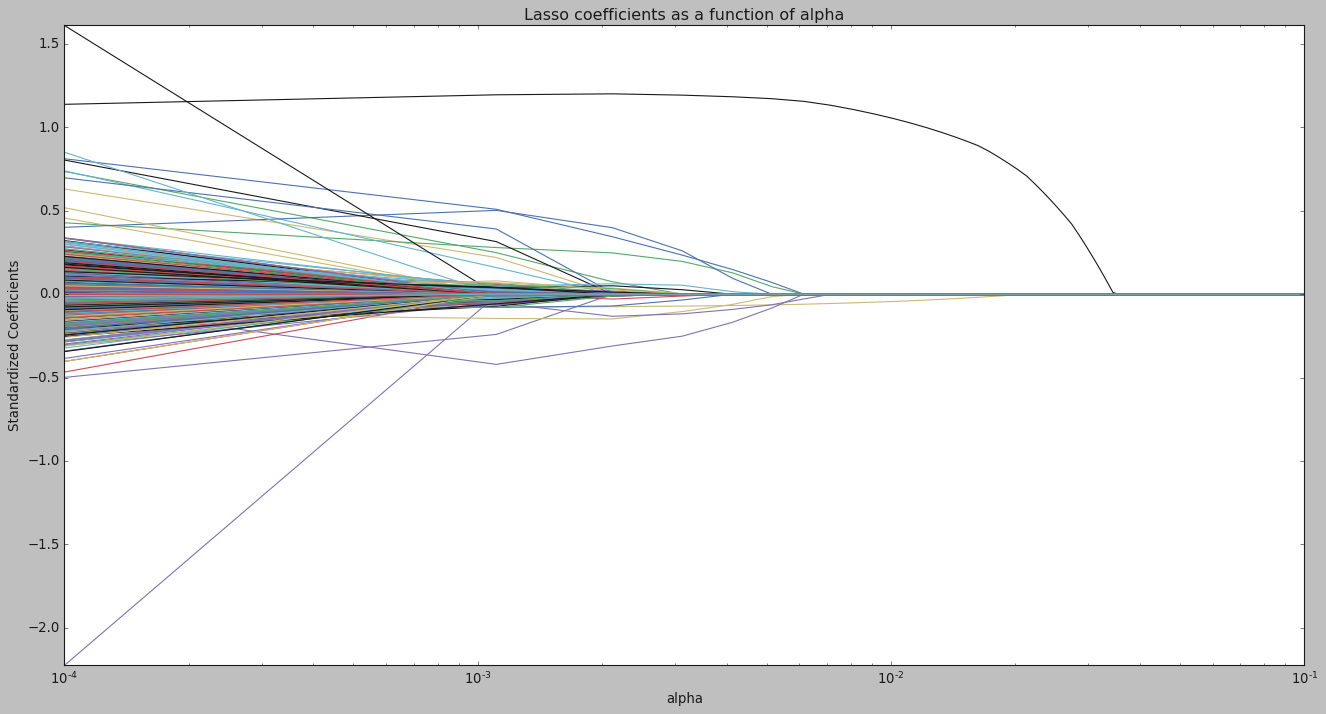

In [80]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

alphas = np.linspace(0.0001,0.1,100)
lasso = Lasso(max_iter=10000,fit_intercept=True, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_rid, y_train_rid)
    coefs.append(lasso.coef_)
fig=plt.figure(figsize=(20, 10))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [ ]:

# define model
model = LassoCV(cv=20, max_iter=10000, random_state=42)
# fit model
model.fit(X_train_rid, y_train_rid)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

In [ ]:
LAS = Lasso(alpha=0.01)
LAS.fit(Xtrain, Ytrain)
print('R squared training set', round(LAS.score(Xtrain, Ytrain)*100, 2))
print('R squared test set', round(LAS.score(Xtest, Ytest)*100, 2))

In [ ]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = LAS.predict(Xtrain)
mse_train = mean_squared_error(Ytrain, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = LAS.predict(Xtest)
mse_test =mean_squared_error(Ytest, pred)
print('MSE test set', round(mse_test, 2))

In [ ]:
print(pd.DataFrame(list(zip(LAS.coef_, X))))

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LassoCV(cv=20)).fit(Xtrain, Ytrain)

lasso = model[-1]
fig=plt.figure(figsize=(40, 30))
plt.semilogx(lasso.alphas_, lasso.mse_path_, ":")
plt.plot(
    lasso.alphas_ ,
    lasso.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2
)
plt.axvline(
    lasso.alpha_, linestyle="--", color="Red", label="alpha: CV estimate"
)
plt.legend(fontsize=30)
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

### Elastic Net

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Elastic = ElasticNet(random_state=0)
model = ElasticNet()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(Xtrain, Ytrain)

In [ ]:
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
model = ElasticNet(alpha=0.1, l1_ratio=0.31)
model.fit(Xtrain, Ytrain)
print(model.coef_)
print(model.intercept_)

In [ ]:
model = ElasticNetCV(cv = 5).fit(Xtrain,Ytrain)
print(model.alpha_)
print(model.coef_)

In [ ]:
Elasticfinal = ElasticNet(alpha = model.alpha_).fit(Xtrain,Ytrain)
Ypred = Elasticfinal.predict(Xtest)
mean_squared_error(Ytest,Ypred)
print('R squared training set', round(Elasticfinal.score(Xtrain, Ytrain)*100, 2))
print('R squared test set', round(Elasticfinal.score(Xtest, Ytest)*100, 2))

In [ ]:
var = pd.DataFrame(list(zip(Elasticfinal.coef_, X)), columns = ["coef","name"])
var = var.loc[var['coef'] != 0]
var

In [ ]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model1 = ElasticNet(alpha=a).fit(X,Y)   
    score = model1.score(X, Y)
    pred_y = model1.predict(X)
    mse = mean_squared_error(Y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

elastic=ElasticNet(alpha=model.alpha_).fit(Xtrain, Ytrain)
ypred = elastic.predict(Xtest)
score = elastic.score(Xtest, Ytest)
mse = mean_squared_error(Ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))
fig=plt.figure(figsize=(40, 30))
x_ax = range(len(Xtest))
plt.scatter(x_ax, Ytest, s=7, color="orange", label="observed")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.title('Result of Elastic net predictions (Standardized)',fontsize=30)
plt.legend(fontsize=50)
plt.show()


## Target feature transformation and glm

### Recode 'n_votes' with log

In [ ]:
dataindependent2 = dataindependent
dataindependent2['Log_n_votes'] = [np.log(x) for x in dataindependent2['n_votes']]
dataindependent2['Log_Revenue'] = [np.log(x) for x in dataindependent2['Revenue']]
del dataindependent2["n_votes"]
del dataindependent2["Revenue"]
dataindependent2

In [ ]:
plt.figure(figsize=(16, 10))

sns.kdeplot(dataindependent2['Log_n_votes'], bw_adjust=0.8, color = 'Red', fill = True)

In [ ]:
scaler = StandardScaler()
dataindependent3 = scaler.fit_transform(dataindependent2)
dataindependentScaled = pd.DataFrame(dataindependent3, columns = dataindependent.columns.values)
X = dataindependentScaled.drop("Log_Revenue", axis= 1)
Y = dataindependentScaled["Log_Revenue"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
import scipy.stats as stats
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
pred_train_lr= lr.predict(Xtrain)
print(np.sqrt(mean_squared_error(Ytrain,pred_train_lr)))
print(r2_score(Ytrain, pred_train_lr))

pred_test_lr= lr.predict(Xtest)
print(np.sqrt(mean_squared_error(Ytest,pred_test_lr))) 
print(r2_score(Ytest, pred_test_lr))
fig, ax = plt.subplots(1, figsize=(16,10))

sm.qqplot(dataindependentScaled['Log_n_votes'],line='45',fit=True,dist=stats.norm, color='Orange',fmt='.g', ax=ax)

ax.grid()
ax.set_title('QQ-plot of Log(n_votes)',fontsize=15)
ax.xaxis.get_label().set_fontsize(12)
ax.yaxis.get_label().set_fontsize(12)
ax.get_lines()[1].set_color("red")
ax.get_lines()[1].set_linewidth("2")
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(16,10))
sm.qqplot(dataindependentScaled['Log_Revenue'],line='45',fit=True,dist=stats.norm,fmt='.g', ax=ax)

ax.grid()
ax.set_title('QQ-plot Log(Revenue)',fontsize=15)
ax.xaxis.get_label().set_fontsize(12)
ax.yaxis.get_label().set_fontsize(12)
ax.get_lines()[1].set_color("red")
ax.get_lines()[1].set_linewidth("2")
plt.show()

In [ ]:
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
pred_train_lr= lr.predict(Xtrain)
print(np.sqrt(mean_squared_error(Ytrain,pred_train_lr)))
print(r2_score(Ytrain, pred_train_lr))

pred_test_lr= lr.predict(Xtest)
print(np.sqrt(mean_squared_error(Ytest,pred_test_lr))) 
print(r2_score(Ytest, pred_test_lr))


In [ ]:
model = ElasticNetCV(cv = 10).fit(Xtrain,Ytrain)
print(model.alpha_)

In [ ]:
Elasticfinal = ElasticNet(alpha = model.alpha_).fit(Xtrain,Ytrain)
Ypred = Elasticfinal.predict(Xtest)
mean_squared_error(Ytest,Ypred)
print('R squared training set', round(Elasticfinal.score(Xtrain, Ytrain)*100, 2))
print('R squared test set', round(Elasticfinal.score(Xtest, Ytest)*100, 2))

In [ ]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model1 = ElasticNet(alpha=a).fit(X,Y)   
    score = model1.score(X, Y)
    pred_y = model1.predict(X)
    mse = mean_squared_error(Y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

elastic=ElasticNet(alpha=model.alpha_).fit(Xtrain, Ytrain)
ypred = elastic.predict(Xtest)
score = elastic.score(Xtest, Ytest)
mse = mean_squared_error(Ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))
fig=plt.figure(figsize=(40, 30))
x_ax = range(len(Xtest))
plt.scatter(x_ax, Ytest, s=10, color="orange", label="observed")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.title('Result of Elastic net predictions (Log Revenue and standardized)',fontsize=30)
plt.legend(fontsize=50)
plt.show()

### Mixed GLM witht the studio feature that explain quantile bimodality

In [ ]:
datamixed
del datamixed["Small"]

In [ ]:
del datamixed["Middle"]
del datamixed["Leader"]
del datamixed["Independent"]

In [ ]:
datamixed['Log_n_votes'] = [np.log(x) for x in datamixed['n_votes']]
datamixed['Log_Revenue'] = [np.log(x) for x in datamixed['Revenue']]

In [ ]:
boxplot = datamixed.boxplot(["Log_Revenue"], by = ["studio"],
                                  boxprops=dict(linestyle='-', linewidth=3, color="r"),
                                  flierprops=dict(linestyle='-', linewidth=3,color="r"),
                                  medianprops=dict(linestyle='-', linewidth=3,color="orange"),
                                  whiskerprops=dict(linestyle='-', linewidth=3,color="r"),
                                  capprops=dict(linestyle='-', linewidth=3),
                     figsize = (30, 30),
                     showmeans = True,
                     notch = False)

boxplot.set_xlabel("Studios")
boxplot.set_ylabel("Log of the Revenue")

In [ ]:
del datamixed["n_votes"]
del datamixed["Revenue"]

In [ ]:
import statsmodels.formula.api as smf
model = smf.mixedlm("Log_Revenue ~ Unnamed: 0 + ratings + production_year + runtime + release_year + Log_n_votes + Adventure + Comedy + Drama + Family + Sport + Biography + Crime + Action +Thriller + Romance + Fantasy + Documentary +  Music + Animation +  Horror + Musical +  Mystery + History + War + Western + Short", datamixed, groups= "studio").fit() 
model.summary()    

## KNN and Wrapper method 

Here we enter the enter in the world of the non parametric regression, as it's common to carry on the distribution of our target feature, we will pursue the previous analyzis done in the **description** section.  In fact as for the non parametric reggression, the target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set (i.e regression model with metaparameter $K$ that predicts the output of a sample as the mean of output of the $K$ nearest neighbours in the features space.
)

Therefore we will fix a number $k$ of observations which are the nearest to a given x:


$$\hat{m}_{NN}(x) = \sum_{i=1}^n \boldsymbol{W}_{ik}(x) Y_i $$

with 

$$\boldsymbol{W}_{ik}(x) = \frac{1}{k}\boldsymbol{I}(X_i \in J_k(x))$$

where $J_k(x)$ is the set of k observations nearest to x. In this case, the smoothing parameter is $k$ with conditions for consistency that $k = k_n \rightarrow \infty$ and that $\frac{k}{n} \rightarrow 0$ for $n \rightarrow \infty$. IN pratice, we can choose the right $k$ by choosing the bandwidth $h$ setting $k = nh$.


Moreover, this is a special case of the **GNN** where for the k-NN the kernel chosen is the following one:

$$K(u) = \frac{1}{2} \boldsymbol{I}(|u| \leq 1)$$

The **KNN** algorithm uses **feature similarity** to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. The algorithm works in 3 steps:

- First, the distance between the new point and each training point is calculated. **Euclidian** for continuous, **Manhattan** for real vectors and **Hamming** Distance for categorical.
- The closest $k$ data points are selected (based on the distance).
- The average of these data points is the final prediction for the new point.


We notice that based on the $k$ value, the final result tends to change. Then how can we figure out the optimum value of $k$? 

In [ ]:
dataindependent

In [ ]:
X = dataindependent.drop("Log_Revenue", axis= 1)
Y = dataindependent["Log_Revenue"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(Xtrain)
x_train = pd.DataFrame(x_train_scaled,columns = Xtrain.columns.values)
print(x_train)

x_test_scaled = scaler.fit_transform(Xtest)
x_test = pd.DataFrame(x_test_scaled, columns = Xtest.columns.values)

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
rmse_val = []
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, Ytrain)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(Ytest,pred))
    rmse_val.append(error)

In [ ]:
curve = pd.DataFrame(rmse_val)  
curve.plot(figsize=(16,10), color="orange", xlabel = "Number of neighbors")
plt.legend(['RMSE'],fontsize=20)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,Ytrain)
model.best_params_

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 9)
knn.fit(x_train, Ytrain)
pred=knn.predict(x_test)
estimation = pd.DataFrame({'pred':exp(pred), 'test':exp(Ytest)})
compute_rmse(pred, Ytest)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

rmse_val = []
for k in range(30):
    k = k+1
    sfs1 = sfs(knn,
           k_features=k,
           forward=True,
           scoring="max_error",
           cv=10)
    sfs1 = sfs1.fit(x_train, Ytrain)
    feat_cols = list(sfs1.k_feature_idx_)
    knn.fit(x_train.iloc[:, feat_cols], Ytrain)
    pred=knn.predict(x_test.iloc[:, feat_cols])
    error = compute_rmse(pred, Ytest)
    rmse_val.append(error)
    print(k)


In [ ]:
curve = pd.DataFrame(rmse_val)  
curve.plot(figsize=(16,10), color="orange", xlabel = "Number of parameters")
plt.legend(['RMSE'],fontsize=20)

In [ ]:
stop

# MLP processes

The reason why **ReLU** became more adopted is that it allows better optimization using Stochastic Gradient Descent, more efficient computation and is scale-invariant, meaning, its characteristics are not affected by the scale of the input. **BERT** is a method of pretraining language representations that was used to create models that **NLP** practicioners can then download and use for free. You can either use these models to extract high quality language features from your text data, or you can fine-tune these models on a specific task (classification, entity recognition, question answering, etc.) with your own data to produce state of the art predictions. These vectors are used as high-quality feature inputs to downstream models. **BERT** produces word representations that are dynamically informed by the words around them.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import TextVectorization

In [ ]:
var0 = np.concatenate((x_train_scaled,x_test_scaled),axis=0)
len(var0)

In [ ]:
dataNN = dataindependent2.copy()
target = dataNN.Log_Revenue.to_numpy()

In [ ]:
emb1 = []
text = pd.DataFrame(data["text_embeddings"])
for i in range(3628):
    emb1.append(literal_eval(text["text_embeddings"].iloc[i]))
emb1 = np.array(emb1)
emb2 = []
img = pd.DataFrame(data["img_embeddings"])
for i in range(3628):
    emb2.append(literal_eval(img  ["img_embeddings"].iloc[i]))
emb2 = np.array(emb2)

In [ ]:
from sklearn.preprocessing import normalize
target_normalized = normalize([target])
target_normalized

In [ ]:
emb1
emb1mean = emb1 - emb1.mean(axis=1, keepdims=True)
emb2
emb2mean = emb2 - emb2.mean(axis=1, keepdims=True)

In [ ]:
def reduce_dimensions_pca(vectors, dimensions=100):
    reduced_vectors = PCA(n_components=dimensions).fit_transform(vectors)
    return reduced_vectors
emb1 = reduce_dimensions_pca(emb1mean)
emb2 = reduce_dimensions_pca(emb2mean)

In [ ]:
shape(emb1)

In [ ]:
inp_emb_data1 = keras.layers.Input(shape=(emb1.shape[1],), name='Input_embedding_text')
inp_emb_data2 = keras.layers.Input(shape=(emb2.shape[1],), name='Input_embedding_img')
inp_num_data = keras.layers.Input(shape=(var0.shape[1],), name = 'Input_var')

In [ ]:
flatten = keras.layers.Flatten(name = 'flatten_text')(inp_emb_data1)
flatten2 = keras.layers.Flatten(name = 'flatten_img')(inp_emb_data2)
conc = keras.layers.Concatenate()([flatten, flatten2])
conc2 = keras.layers.Concatenate()([inp_num_data, conc])
dense1 = keras.layers.Dense(2000, activation=tf.nn.relu, name = 'ReLu1')(conc2)
drop1 = tf.keras.layers.Dropout(0.4)(dense1)
dense2 = keras.layers.Dense(500, activation=tf.nn.relu, name = 'ReLu2')(drop1)
dense3 = keras.layers.Dense(50, activation=tf.nn.relu, name = 'ReLu3')(dense2)
out = keras.layers.Dense(1, activation=tf.nn.relu, name = 'ReLu4')(dense3)
model = keras.Model(inputs=[inp_emb_data1,inp_emb_data2, inp_num_data], outputs=out)
model.compile(optimizer=tf.optimizers.Adam(0.01),
              loss=keras.losses.mean_squared_error,
              metrics=[keras.metrics.mean_squared_error])
print(model.summary())

In [ ]:
import pydot
import pydotplus
import graphviz
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TR",
    expand_nested=False,
    dpi=96, 
    layer_range=None,
    show_layer_activations=False,
)


In [ ]:
x_train

In [ ]:
history = model.fit([emb1,emb2, var0], target,validation_split=0.05, epochs=5000, batch_size=2000,shuffle=True, verbose=1)

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()





## As the NN does'nt fit well we try to recode categorical features with embedding layers


In [ ]:
group = []
groups = data.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) == 1:
         group.append(i)
dataNN = data.replace(group, "Independent")
group = []
groups = data.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) <= 40:
         group.append(i)
dataNN = dataNN.replace(group, "Small")
group = []
groups = data.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) <= 100:
         group.append(i)
dataNN = dataNN.replace(group, "Middle")
group = []
groups = data.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) <= 200:
         group.append(i)
dataNN = dataNN.replace(group, "Leader")
print(dataNN.groupby('studio').apply(len))


In [ ]:
del dataNN["img_url"]
del dataNN["description"]

In [ ]:
dataNN['Revenue'] = np.log(dataNN['Revenue'])
dataNN['n_votes'] = np.log(dataNN['n_votes'])

In [ ]:
emb1 = []
text = pd.DataFrame(data["text_embeddings"])
for i in range(3628):
    emb1.append(literal_eval(text["text_embeddings"].iloc[i]))
emb1 = np.array(emb1)
emb2 = []
img = pd.DataFrame(data["img_embeddings"])
for i in range(3628):
    emb2.append(literal_eval(img  ["img_embeddings"].iloc[i]))
emb2 = np.array(emb2)
def reduce_dimensions_pca(vectors, dimensions=50):
    reduced_vectors = PCA(n_components=dimensions).fit_transform(vectors)
    return reduced_vectors
emb1 = reduce_dimensions_pca(emb1)
emb2 = reduce_dimensions_pca(emb2)

In [ ]:
dataNN

# HGBM with reencoding categorical variables comparison

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

## Gradient boosting estimator with dropped categorical features

In [ ]:
dropper = make_column_transformer(
    ("drop", make_column_selector(dtype_include="category")), remainder="passthrough"
)
hist_dropped = make_pipeline(dropper, HistGradientBoostingRegressor(random_state=42))

## Gradient boosting estimator with one-hot encoding


In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

hist_one_hot = make_pipeline(
    one_hot_encoder, HistGradientBoostingRegressor(random_state=42)
)

## Gradient boosting estimator with ordinal encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
    # Use short feature names to make it easier to specify the categorical
    # variables in the HistGradientBoostingRegressor in the next step
    # of the pipeline.
    verbose_feature_names_out=False,
)

hist_ordinal = make_pipeline(
    ordinal_encoder, HistGradientBoostingRegressor(random_state=42)
)

## Gradient boosting estimator with native categorical support

In [ ]:
dataindependent2

In [ ]:
boost = HistGradientBoostingRegressor(loss='least_squares', max_iter=7000,learning_rate=0.1,max_depth=4)
X = dataindependent2.drop(["Log_Revenue"], axis= 1)
Y = dataindependent2["Log_Revenue"]
X_train,X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.1)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
x_train_data = pd.DataFrame(X_train_std, columns = list(dataindependent2.drop(["Log_Revenue"], axis= 1).columns))
boost.fit(x_train_data,y_train)

In [ ]:
boost.score(x_train_data,y_train)
y_pred = boost.predict(X_test)
look = pd.DataFrame(y_pred, y_test)
look

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features = ['Log_n_votes','Time']
sns.color_palette("hls", 8)
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("PDP")
pdp = PartialDependenceDisplay.from_estimator(boost, x_train_data, features, method='brute', ax=ax)

In [ ]:
import numpy as np
import mpl_toolkits.mplot3d
from sklearn.inspection import partial_dependence

my_cmap = plt.get_cmap("nipy_spectral")

fig = plt.figure(figsize=(15,10))
features = ('Documentary','ratings')
pdp = partial_dependence(
    boost, x_train_data, features=features, kind="average", grid_resolution=10
)
XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
Z = pdp.average[0].T
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)

surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=my_cmap, edgecolor="k")
ax.xaxis.labelpad = 20
ax.set_xlabel(features[0])
ax.yaxis.labelpad = 20
ax.set_ylabel(features[1])
ax.zaxis.labelpad = 20
ax.set_zlabel("Partial dependence")
ax.view_init(elev=10, azim=52)
plt.colorbar(surf)
plt.suptitle("Partial dependence variables\n"
    " with Gradient Boosting"
)
plt.subplots_adjust(top=1.0)
plt.savefig('PDPArea.png',bbox_inches='tight')
plt.show()

In [ ]:
compute_rmse(y_pred, y_test)